# ------------- 판다스관점 ---------------

## 데이터 먼징(랭글링)
- 데이터를 불러와서 그걸 합치고 간단한 전처리해서 기초분석까지 하는 것
- ETL은 유사한데 개발자 관점

주피터 노트북에서 버전을 관리할 때 유용한 것

In [8]:
!pip install version-information # 갈래상 install에는 - 나머지는_

^C


In [1]:
import pandas as pd

In [4]:
pd.__version__

'0.24.2'

In [5]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

load_ext : 추가 매직매서드를 사용하겠다.

In [6]:
%load_ext version_information

In [7]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %version_information  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%p

단점 : 한글이 깨진다, 저자 정보를 넣을 수 없다.

In [10]:
%version_information numpy, pandas

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.17134 SP0
numpy 1.16.2
pandas 0.24.2
Tue Jul 23 12:14:35 2019 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

깃 사용해서 버전 관리할 때 유용하게 사용된다. 앞으로 올릴 때 워터마크로 버전을 붙여서 올리자!

In [11]:
!pip install watermark

In [12]:
%load_ext watermark

단점: numpy, pandas 띄어쓰기가 들어가게 되면 에러난다.

In [14]:
%watermark -a'박재은' -d -p numpy,pandas

박재은 2019-07-23 

numpy 1.16.2
pandas 0.24.2


# 랭글링
1. 데이터를 불러오기
    - 잘 불러왔는지 확인하기 (옵션 건드리면서 잘 불러올 때 까지 부르기)
2. 데이터 전처리
3. 데이터 탐색

In [15]:
len([ _ for _ in dir(pd) if _.startswith('read_')])

18

In [16]:
[ _ for _ in dir(pd) if _.startswith('read_')]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

옵션이 많다 -> 데이터를 마음대로 저장하는 사람이 있다. -> 때에 따라서 옵션을 지정해 줘야 한다.

https://archive.ics.uci.edu/ml/index.php

header에 값이 들어가있으면 header=None 옵션을 주면 된다.
- header=None : 헤더가 없는 데이터이다.
- 헤더가 없으면 자동으로 숫자를 붙여준다.

In [7]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [21]:
data

0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
5    5.4  3.9  1.7  0.4     Iris-setosa
6    4.6  3.4  1.4  0.3     Iris-setosa
7    5.0  3.4  1.5  0.2     Iris-setosa
8    4.4  2.9  1.4  0.2     Iris-setosa
9    4.9  3.1  1.5  0.1     Iris-setosa
10   5.4  3.7  1.5  0.2     Iris-setosa
11   4.8  3.4  1.6  0.2     Iris-setosa
12   4.8  3.0  1.4  0.1     Iris-setosa
13   4.3  3.0  1.1  0.1     Iris-setosa
14   5.8  4.0  1.2  0.2     Iris-setosa
15   5.7  4.4  1.5  0.4     Iris-setosa
16   5.4  3.9  1.3  0.4     Iris-setosa
17   5.1  3.5  1.4  0.3     Iris-setosa
18   5.7  3.8  1.7  0.3     Iris-setosa
19   5.1  3.8  1.5  0.3     Iris-setosa
20   5.4  3.4  1.7  0.2     Iris-setosa
21   5.1  3.7  1.5  0.4     Iris-setosa
22   4.6  3.6  1.0  0.2     Iris-setosa
23   5.1  3.3  1.7  0.5     Iris-setosa
24   4.8  3.4  1.9  0.2     Iris-setosa
25   5.0  3.0  1.6  0.2     Iris-setosa
26   5.0  3.4  1.6  0.4     Iris-setosa
27   5.2  3.5  1.5  0.2     Iris-setosa
28   5.2  3.4  1.4  0.2     Iris-setosa
29   4.7  3.2  1.6  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
120  6.9  3.2  5.7  2.3  Iris-virginica
121  5.6  2.8  4.9  2.0  Iris-virginica
122  7.7  2.8  6.7  2.0  Iris-virginica
123  6.3  2.7  4.9  1.8  Iris-virginica
124  6.7  3.3  5.7  2.1  Iris-virginica
125  7.2  3.2  6.0  1.8  Iris-virginica
126  6.2  2.8  4.8  1.8  Iris-virginica
127  6.1  3.0  4.9  1.8  Iris-virginica
128  6.4  2.8  5.6  2.1  Iris-virginica
129  7.2  3.0  5.8  1.6  Iris-virginica
130  7.4  2.8  6.1  1.9  Iris-virginica
131  7.9  3.8  6.4  2.0  Iris-virginica
132  6.4  2.8  5.6  2.2  Iris-virginica
133  6.3  2.8  5.1  1.5  Iris-virginica
134  6.1  2.6  5.6  1.4  Iris-virginica
135  7.7  3.0  6.1  2.3  Iris-virginica
136  6.3  3.4  5.6  2.4  Iris-virginica
137  6.4  3.1  5.5  1.8  Iris-virginica
138  6.0  3.0  4.8  1.8  Iris-virginica
139  6.9  3.1  5.4  2.1  Iris-virginica
140  6.7  3.1  5.6  2.4  Iris-virginica
141  6.9  3.1  5.1  2.3  Iris-virginica
142  5.8  2.7  5.1  1.9  Iris-virginica
143  6.8  3.2  5.9  2.3  Iris-virginica
144  6.7  3.3  5.7  2.5  Iris-virginica
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]

어트리뷰트 방식은 숫자 안됨! 키방식 사용 :D

In [22]:
data.0

SyntaxError: invalid syntax (<ipython-input-22-f50bd7659472>, line 1)

In [24]:
data[0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: 0, Length: 150, dtype: float64

In [1]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002718DC216A0>,
      dtype=object)

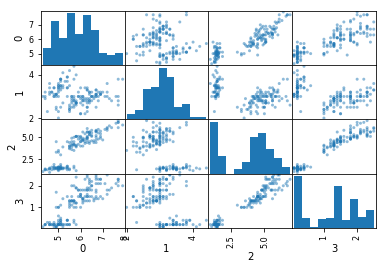

In [29]:
pd.plotting.scatter_matrix(data)

In [30]:
data.mean()

0    5.843333
1    3.054000
2    3.758667
3    1.198667
dtype: float64

## ★★★ 이거는 무조건 암기하자!!! 
### 데이터 불러오면 info() 무조건 찍어보기!

- RangeIndex : 내가 인덱스를 지정하지 않으면 나오는 애.
- 전체 행 개수를 알 수 있다. 150개
- 컬럼 개수를 알 수 있다. 5개
- 150 non-null: 미싱 데이터가 없다.
    1. 삭제한다.
    2. 임의의 값을 채워 넣는다.
    3. 유사한 데이터를 보고 채워 넣는다. 등...
- object : 판다스에서는 문자열을 object로 표시한다. object면 문자열이라고 생각하면 된다.
- dtypes : 여러개의 타입을 알려준다.
- memory usage를 알려준다. -> 모든 데이터를 메모리에 올린다.
- 기계학습에는 숫자만 넣을 수 있다. -> 형변환을 시켜줘야한다.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### describe()
- 각 컬럼에대한 통계값을 보여준다.
- count는 미싱데이터를 포함하지 않는 값, size는 미싱 데이터 포함
- 정규성
- 평균
- 표준편차
- 중심극한정리 : 수가 크면 정규 분포에 가까워진다.
- 큰 수의 정리 : ??????????????????
- 왜도(어디로 치우치는지)와 첨도(얼마나 뾰족)
- min ~ max : 박스플랏을 알 수 있음.
- 문자 데이터에 대한 정보는 나오지 않음
    - include 옵션을 사용하면 볼 수 있음

- [중심극한정리](https://ko.wikipedia.org/wiki/%EC%A4%91%EC%8B%AC_%EA%B7%B9%ED%95%9C_%EC%A0%95%EB%A6%AC)

- 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리이다.
- ex) 동전 던지기 확률 횟수가 무한대로 가면 정규 분포가 된다.

- [큰수의법칙](https://ko.wikipedia.org/wiki/%ED%81%B0_%EC%88%98%EC%9D%98_%EB%B2%95%EC%B9%99)
- 큰 모집단에서 무작위로 뽑은 표본의 평균이 전체 모집단의 평균과 가까울 가능성이 높다는 통계와 확률 분야의 기본 개념이다.

- [왜도(비대칭도)](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)
- 비대칭성을 나타내는 지표로 왜도의 값이 음수가 되면 확률 밀도 함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이된다.

- [첨도](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)
- 확률 분포에서 뾰족한 정도를 나타내는 척도이다. 첨도값이 3에 가까울 수록 산포도가 정규 분포에 가깝다.

In [32]:
data.describe()

0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

include 옵션을 줘서 원하는 자료형의 describe를 본다

In [37]:
data.describe(include='object')

4
count           150
unique            3
top     Iris-setosa
freq             50

all을 사용하여 불러오면 모든 자료형을 가져올 수 있다.
- NaN이 있어서 보기 이쁘지 않으므로 보통 따로 본다

In [38]:
data.describe(include='all')

0           1           2           3            4
count   150.000000  150.000000  150.000000  150.000000          150
unique         NaN         NaN         NaN         NaN            3
top            NaN         NaN         NaN         NaN  Iris-setosa
freq           NaN         NaN         NaN         NaN           50
mean      5.843333    3.054000    3.758667    1.198667          NaN
std       0.828066    0.433594    1.764420    0.763161          NaN
min       4.300000    2.000000    1.000000    0.100000          NaN
25%       5.100000    2.800000    1.600000    0.300000          NaN
50%       5.800000    3.000000    4.350000    1.300000          NaN
75%       6.400000    3.300000    5.100000    1.800000          NaN
max       7.900000    4.400000    6.900000    2.500000          NaN

In [40]:
data.describe(include=['number'])

0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

통계적 그래프 그리는 패키지 
- 통계 + 이쁜 그래프

In [8]:
import seaborn as sns

파란색은 어느 파트에서든 떨어져 있으므로 분리하기 쉽다. 
주황색과 초록색은 겹친 것 있고 분리 된 것이 있고 섞여있으므로 분리하기 쉽지 않다.

hue에 컬럼 명을 넣으면 거기에 있는 데이터를 다른 색으로 표현해서 보여줌

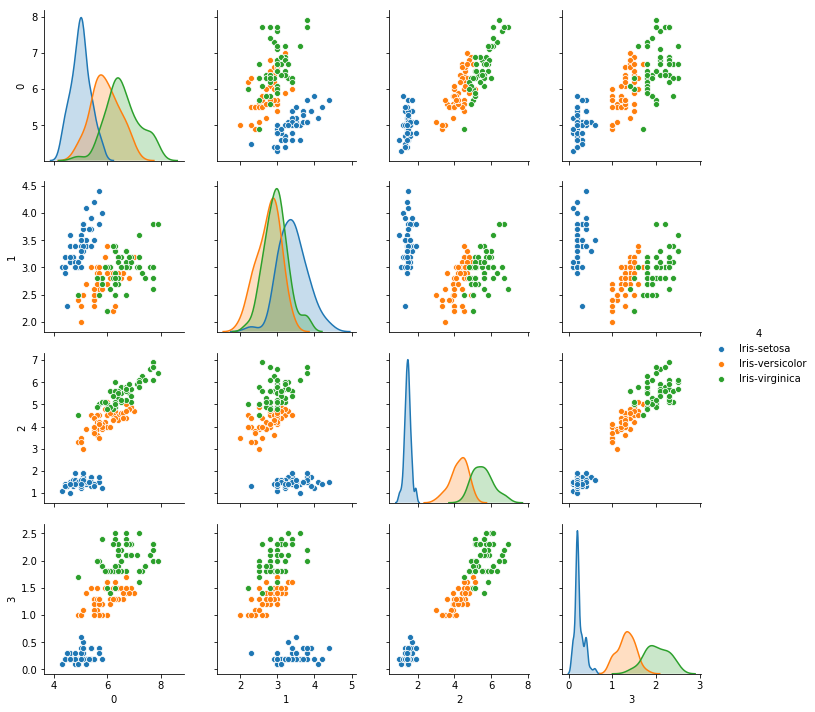

In [43]:
sns.pairplot(data, hue=4)

왜도

In [33]:
data.skew()

0    0.314911
1    0.334053
2   -0.274464
3   -0.104997
dtype: float64

In [34]:
data.kurt()

0   -0.552064
1    0.290781
2   -1.401921
3   -1.339754
dtype: float64

In [35]:
data.kurtosis()

0   -0.552064
1    0.290781
2   -1.401921
3   -1.339754
dtype: float64

- [박스플롯](https://leebaro.tistory.com/entry/%EB%B0%95%EC%8A%A4-%ED%94%8C%EB%A1%AFbox-plot-%EC%84%A4%EB%AA%85)
- 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 집합의 범위와 중앙값을 빠르게 확인하려는 목적으로 사용하고, 이상치(outlier)가 있는지 확인

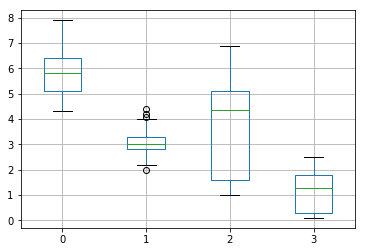

In [11]:
data.boxplot();

### 분석에서의 tips 데이터

In [13]:
tips = sns.load_dataset('tips')

In [54]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
17        16.29  3.71    Male     No   Sun  Dinner     3
18        16.97  3.50  Female     No   Sun  Dinner     3
19        20.65  3.35    Male     No   Sat  Dinner     3
20        17.92  4.08    Male     No   Sat  Dinner     2
21        20.29  2.75  Female     No   Sat  Dinner     2
22        15.77  2.23  Female     No   Sat  Dinner     2
23        39.42  7.58    Male     No   Sat  Dinner     4
24        19.82  3.18    Male     No   Sat  Dinner     2
25        17.81  2.34    Male     No   Sat  Dinner     4
26        13.37  2.00    Male     No   Sat  Dinner     2
27        12.69  2.00    Male     No   Sat  Dinner     2
28        21.70  4.30    Male     No   Sat  Dinner     2
29        19.65  3.00  Female     No   Sat  Dinner     2
..          ...   ...     ...    ...   ...     ...   ...
214       28.17  6.50  Female    Yes   Sat  Dinner     3
215       12.90  1.10  Female    Yes   Sat  Dinner     2
216       28.15  3.00    Male    Yes   Sat  Dinner     5
217       11.59  1.50    Male    Yes   Sat  Dinner     2
218        7.74  1.44    Male    Yes   Sat  Dinner     2
219       30.14  3.09  Female    Yes   Sat  Dinner     4
220       12.16  2.20    Male    Yes   Fri   Lunch     2
221       13.42  3.48  Female    Yes   Fri   Lunch     2
222        8.58  1.92    Male    Yes   Fri   Lunch     1
223       15.98  3.00  Female     No   Fri   Lunch     3
224       13.42  1.58    Male    Yes   Fri   Lunch     2
225       16.27  2.50  Female    Yes   Fri   Lunch     2
226       10.09  2.00  Female    Yes   Fri   Lunch     2
227       20.45  3.00    Male     No   Sat  Dinner     4
228       13.28  2.72    Male     No   Sat  Dinner     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
230       24.01  2.00    Male    Yes   Sat  Dinner     4
231       15.69  3.00    Male    Yes   Sat  Dinner     3
232       11.61  3.39    Male     No   Sat  Dinner     2
233       10.77  1.47    Male     No   Sat  Dinner     2
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

category : 문자열의 종류가 적은 것은 카테고리로 해 놓으면 사용하기 편하다.

In [48]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


[오컴의 면도날](https://ko.wikipedia.org/wiki/%EC%98%A4%EC%BB%B4%EC%9D%98_%EB%A9%B4%EB%8F%84%EB%82%A0)
- 많은 것들을 필요없이 가정해서는 안된다.
- 더 적은 수의 논리로 설명이 가능한 경우, 많은 수의 논리를 세우지 말라.
- = 같은 현상을 설명하는 두 개의 주장이 있다면, 간단한 쪽을 선택하라.

[차원의 저주](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
- 저차원에서는 발생하지 않는 고차원 공간에서 분석하고 구성할 때 발생하는 다양한 현상을 나타낸다.

덩치, 성별, 사용 비용, 흡연 여부 등에 따라 팁을 얼마를 주는가
- 도메인 지식이 있으면 size(덩치)가 별로 관련 없다는것을 알 수 있다.

In [49]:
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [53]:
tips.describe(include='category')

sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176

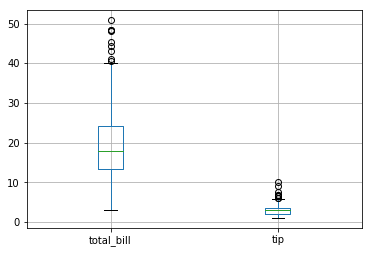

In [14]:
tips[['total_bill', 'tip']].boxplot();

#### aggregation(집합) 분석을 판다스에서 지원해준다.
↓
- 이 분석을 조심해야한다. 
- 경향을 보여주기에는 좋다.
- 분석해서 그래프를 그린다.

groupby('sex') : 성별로 묶는다.

In [57]:
tips.groupby('sex').mean()

total_bill       tip      size
sex                                   
Male     20.744076  3.089618  2.630573
Female   18.056897  2.833448  2.459770

In [58]:
tips.groupby('sex').sum()

total_bill     tip  size
sex                             
Male       3256.82  485.07   413
Female     1570.95  246.51   214

In [59]:
tips.groupby('sex').max()

total_bill   tip  size
sex                           
Male         50.81  10.0     6
Female       44.30   6.5     6

In [60]:
tips.groupby('sex').min()

total_bill  tip  size
sex                          
Male          7.25  1.0     1
Female        3.07  1.0     1

In [63]:
tips.groupby('day').max()

total_bill    tip  size
day                          
Thur       43.11   6.70     6
Fri        40.17   4.73     4
Sat        50.81  10.00     5
Sun        48.17   6.50     6

In [65]:
tips.groupby(['sex', 'day']).mean()[['total_bill', 'tip']]

total_bill       tip
sex    day                       
Male   Thur   18.714667  2.980333
       Fri    19.857000  2.693000
       Sat    20.802542  3.083898
       Sun    21.887241  3.220345
Female Thur   16.715312  2.575625
       Fri    14.145556  2.781111
       Sat    19.680357  2.801786
       Sun    19.872222  3.367222

In [70]:
tips.groupby(['sex', 'day','time'])[['total_bill', 'tip']].mean()

total_bill       tip
sex    day  time                        
Male   Thur Lunch    18.714667  2.980333
            Dinner         NaN       NaN
       Fri  Lunch    11.386667  1.900000
            Dinner   23.487143  3.032857
       Sat  Lunch          NaN       NaN
            Dinner   20.802542  3.083898
       Sun  Lunch          NaN       NaN
            Dinner   21.887241  3.220345
Female Thur Lunch    16.648710  2.561935
            Dinner   18.780000  3.000000
       Fri  Lunch    13.940000  2.745000
            Dinner   14.310000  2.810000
       Sat  Lunch          NaN       NaN
            Dinner   19.680357  2.801786
       Sun  Lunch          NaN       NaN
            Dinner   19.872222  3.367222

In [16]:
t = tips.groupby(['sex'])[['total_bill', 'tip']].mean()

plot을 사용하면 그래프를 그릴 수 있다.

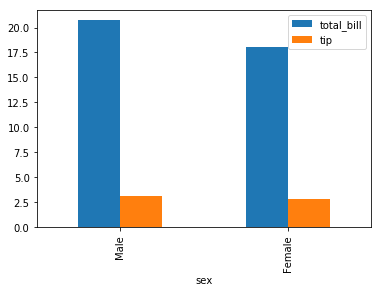

In [17]:
t.plot.bar();

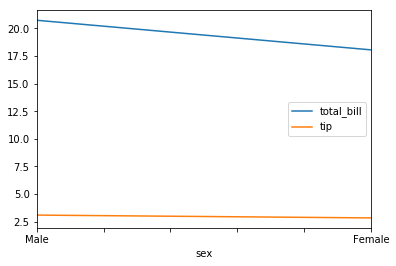

In [74]:
t.plot.line()

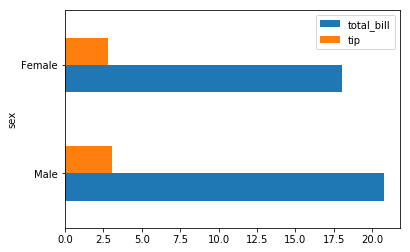

In [75]:
t.plot.barh()

공공데이터 csv 불러오는 방법 
- engine, encoding 설정하면 공공데이터는 99% 불러올 수 있다.

#### 1. 연번을 인덱스로 만드는 방법

불러들일 때 부터 인덱스를 정할 수 있다.

In [92]:
olds = pd.read_csv('ttt.csv', engine='python', encoding='cp949', index_col='연번')

In [93]:
olds

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
연번                                                                              
1         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
2    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
3       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
4        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
5       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
6         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
7       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
8         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
9         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리

In [89]:
olds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
연번       81 non-null int64
경로당명칭    81 non-null object
소재지      81 non-null object
부지(㎡)    81 non-null float64
건물(㎡)    81 non-null float64
회원총계     81 non-null int64
남자회원     81 non-null int64
여자회원     81 non-null int64
전화번호     81 non-null object
기준일자     81 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 6.4+ KB


#### 2.인덱스를 자료 불러 들이고 나서 정하는 방식

In [2]:
olds = pd.read_csv('ttt.csv', engine='python', encoding='cp949')

In [3]:
# inplace=False -> 자기 자신이 안바뀐다
olds.set_index('연번')

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
연번                                                                              
1         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
2    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
3       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
4        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
5       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
6         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
7       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
8         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
9         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리

In [4]:
olds

연번        경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  \
0    1        내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40   
1    2   시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24   
2    3      홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41   
3    4       황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40   
4    5      홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31   
5    6        장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38   
6    7      내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35   
7    8        내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40   
8    9        천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17   
9   10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30   
10  11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25   
11  12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38   
12  13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24   
13  14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45   
14  15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39   
15  16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27   
16  17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22   
17  18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29   
18  19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60   
19  20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37   
20  21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64   
21  22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25   
22  23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51   
23  24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30   
24  25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30   
25  26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25   
26  27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20   
27  28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40   
28  29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25   
29  30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44   
..  ..          ...                              ...      ...     ...   ...   
51  52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24   
52  53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22   
53  54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55   
54  55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37   
55  56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56   
56  57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31   
57  58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60   
58  59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46   
59  60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54   
60  61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30   
61  62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43   
62  63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40   
63  64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35   
64  65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59   
65  66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42   
66  67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30   
67  68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22   
68  69       꽃동네경로당          대구광역시 서구 평리로 221 꽃동네아파트    50.08   50.08    37   
69  70       두견화경로당  대구광역시 서구 국채보상로36길 42 중리진달래1차아파트  

In [5]:
olds_raw = olds.copy()

In [6]:
# 재할당 안해도 변한다.
olds.set_index('연번', inplace=True)

In [7]:
olds

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
연번                                                                              
1         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
2    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
3       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
4        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
5       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
6         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
7       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
8         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
9         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리

#### 3. '연번'없애버린다.
- 이게 제일 효율적

RangeIndex였는데 Int64Index로 변했다.
- RangeIndex가 더 효율적이다.

In [8]:
olds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 81
Data columns (total 9 columns):
경로당명칭    81 non-null object
소재지      81 non-null object
부지(㎡)    81 non-null float64
건물(㎡)    81 non-null float64
회원총계     81 non-null int64
남자회원     81 non-null int64
여자회원     81 non-null int64
전화번호     81 non-null object
기준일자     81 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 6.3+ KB


reset_index는 인덱스를 리셋하는 것
- RangeIndex가 새로 생김(drop =False)

In [9]:
olds.reset_index()

연번        경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  \
0    1        내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40   
1    2   시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24   
2    3      홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41   
3    4       황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40   
4    5      홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31   
5    6        장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38   
6    7      내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35   
7    8        내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40   
8    9        천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17   
9   10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30   
10  11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25   
11  12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38   
12  13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24   
13  14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45   
14  15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39   
15  16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27   
16  17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22   
17  18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29   
18  19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60   
19  20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37   
20  21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64   
21  22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25   
22  23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51   
23  24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30   
24  25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30   
25  26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25   
26  27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20   
27  28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40   
28  29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25   
29  30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44   
..  ..          ...                              ...      ...     ...   ...   
51  52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24   
52  53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22   
53  54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55   
54  55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37   
55  56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56   
56  57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31   
57  58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60   
58  59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46   
59  60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54   
60  61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30   
61  62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43   
62  63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40   
63  64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35   
64  65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59   
65  66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42   
66  67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30   
67  68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22   
68  69       꽃동네경로당          대구광역시 서구 평리로 221 꽃동네아파트    50.08   50.08    37   
69  70       두견화경로당  대구광역시 서구 국채보상로36길 42 중리진달래1차아파트  

기존의 인덱스 값을 삭제시킴

In [10]:
olds.reset_index(drop=True)

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

반영시키려면 inplace 설정을 True로 해줌

In [11]:
olds.reset_index(drop=True, inplace=True)

In [12]:
olds

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

In [13]:
olds = olds_raw.copy()

##### 컬럼 지우는 방법
- drop
- 판다스에서는 지울때 drop을 사용한다.

In [14]:
olds.drop(columns='연번')

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

In [15]:
olds

연번        경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  \
0    1        내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40   
1    2   시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24   
2    3      홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41   
3    4       황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40   
4    5      홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31   
5    6        장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38   
6    7      내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35   
7    8        내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40   
8    9        천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17   
9   10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30   
10  11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25   
11  12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38   
12  13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24   
13  14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45   
14  15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39   
15  16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27   
16  17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22   
17  18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29   
18  19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60   
19  20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37   
20  21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64   
21  22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25   
22  23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51   
23  24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30   
24  25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30   
25  26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25   
26  27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20   
27  28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40   
28  29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25   
29  30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44   
..  ..          ...                              ...      ...     ...   ...   
51  52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24   
52  53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22   
53  54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55   
54  55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37   
55  56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56   
56  57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31   
57  58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60   
58  59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46   
59  60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54   
60  61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30   
61  62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43   
62  63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40   
63  64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35   
64  65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59   
65  66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42   
66  67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30   
67  68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22   
68  69       꽃동네경로당          대구광역시 서구 평리로 221 꽃동네아파트    50.08   50.08    37   
69  70       두견화경로당  대구광역시 서구 국채보상로36길 42 중리진달래1차아파트  

In [16]:
olds.drop(columns='연번', inplace=True)

In [17]:
olds

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

index를 라벨이라고 한다.
-> drop으로 row를 지울 수 있다.

In [18]:
olds.drop(labels=0)

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
30        동흔경로당           대구광역시 서구 국채보상로76길 27-1   145.00   62.98    30     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

In [116]:
olds.drop(labels=[2,3,4,])

경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
30        동흔경로당           대구광역시 서구 국채보상로76길 27-1   145.00   62.98    30     2   
31        일구경로당               대구광역시 서구 평리로85길 15   155.00   83.46    36     1   
32      비산우방경로당        대구광역시 서구 통학로24길 60 비산우방맨션   100.00  100.00    28    12   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

axis를 이용하여 컬럼을 지울 수 있으므로 인덱스가 아니고 labels라고 한다.

In [19]:
olds.drop(labels='소재지', axis=1)

경로당명칭    부지(㎡)   건물(㎡)  회원총계  남자회원  여자회원          전화번호        기준일자
0         내서경로당   139.80  160.80    40     0    40  053-554-0739  2017-11-10
1    시영내당(아)경로당   119.00  119.00    24     6    18  053-567-9772  2017-11-10
2       홍실1차경로당    90.00   90.00    41     9    32  053-551-8286  2017-11-10
3        황성정경로당   134.74  134.74    40    10    30  053-553-9874  2017-11-10
4       홍실2차경로당   154.11  154.11    31     0    31  053-556-8220  2017-11-10
5         장수경로당   159.00  112.00    38     5    33  053-572-8123  2017-11-10
6       내당2동경로당    93.00   62.64    35    10    25  053-571-1637  2017-11-10
7         내당경로당   216.00  183.68    40     5    35  053-565-0437  2017-11-10
8         천일경로당   165.00  172.84    17     2    15  053-566-3077  2017-11-10
9         삼화경로당   130.00  136.02    30     5    25  053-565-5084  2017-11-10
10      삼익맨션경로당   109.09  109.09    25     0    25  053-567-7765  2017-11-10
11      광장타운경로당    76.00   76.00    38     4    34  053-563-3087  2017-11-10
12        명우경로당    49.60   49.60    24     5    19  053-558-5006  2017-11-10
13     삼익뉴타운경로당    66.00  132.00    45    13    32  053-562-1237  2017-11-10
14      내당4동경로당   142.00   60.10    39    23    16  053-562-4594  2017-11-10
15        내우경로당   169.50  148.51    27     0    27  053-564-4346  2017-11-10
16       코오롱경로당    29.75   29.75    22     0    22  053-552-5293  2017-11-10
17      동화타운경로당    40.48   40.48    29    14    15  053-558-0504  2017-11-10
18        웰빙경로당    34.20   34.20    60     0    60  053-523-3210  2017-11-10
19        당산경로당   165.00  180.55    37    12    25  053-565-9636  2017-11-10
20        원상경로당   158.00  163.27    64    31    33  053-551-3383  2017-11-10
21       만수정경로당    18.54   18.54    25     5    20  053-552-8812  2017-11-10
22        거창경로당   251.00  185.44    51    17    34  053-565-5555  2017-11-10
23      비산1동경로당   124.00  146.20    30     8    22  053-553-0968  2017-11-10
24        비룡경로당   218.00  126.65    30    22     8  053-564-2265  2017-11-10
25       인동촌경로당   483.00   80.25    25    25     0  053-555-6555  2017-11-10
26        달성경로당   129.00  138.56    20     0    20  053-554-0174  2017-11-10
27        모범경로당   238.00  272.40    40    25    15  053-558-9819  2017-11-10
28        장수경로당    39.54   39.54    25     0    25          전화없음  2017-11-10
29        상록경로당   201.00  163.30    44     2    42  053-571-2901  2017-11-10
..          ...      ...     ...   ...   ...   ...           ...         ...
51        평리경로당   215.00   94.87    24     0    24  053-551-9076  2017-11-10
52        만수경로당    26.44   26.44    22     0    22  053-562-1842  2017-11-10
53        청수경로당   118.70  120.40    55     5    50  053-554-2867  2017-11-10
54        평광경로당   183.90  108.86    37    20    17  053-561-0608  2017-11-10
55        장수경로당   165.80  151.46    56    21    35  053-559-1369  2017-11-10
56    평리청구타운경로당   100.00  100.00    31     1    30  053-563-8824  2017-11-10
57    평리푸르지오경로당    79.00   79.00    60    20    40  053-522-0095  2017-11-10
58      평리5동경로당  1293.30  210.20    46     0    46  053-562-7017  2017-11-10
59        도기경로당   191.30  113.66    54     5    49  053-566-4363  2017-11-10
60        광명경로당   140.40  140.40    30     1    29  053-557-0085  2017-11-10
61      평리6동경로당   174.40  185.69    43    14    29  053-561-3717  2017-11-10
62        복지경로당    63.66   63.66    40    13    27  053-566-7559  2017-11-10
63       새동네경로당   157.00  167.85    35     5    30  053-563-9259  2017-11-10
64      상리1동경로당   233.00  256.08    59    10    49  053-563-2110  2017-11-10
65      상리2동경로당   243.00  263.90    42     8    34  053-555-0977  2017-11-10
66        이현경로당   324.00  136.00    30    11    19  053-554-5147  2017-11-10
67    중리시영2차경로당    35.07   35.07    22     7    18  053-565-2569  2017-11-10
68       꽃동네경로당    50.08   50.08    37     5    32  053-558-0512  2017-11-10
69       두견화경로당    42.69   42.69    20     0    20  053-555-0127  2017-11-10
70        중리경로당   583.00  193.80    62    20    42  053-565-7650  2017-11-10
71    

In [176]:
olds = olds_raw.copy()

In [177]:
olds

연번        경로당명칭                              소재지    부지(㎡)   건물(㎡)  회원총계  \
0    1        내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40   
1    2   시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24   
2    3      홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41   
3    4       황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40   
4    5      홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31   
5    6        장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38   
6    7      내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35   
7    8        내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40   
8    9        천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17   
9   10        삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30   
10  11      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25   
11  12      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38   
12  13        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24   
13  14     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45   
14  15      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39   
15  16        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27   
16  17       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22   
17  18      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29   
18  19        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60   
19  20        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37   
20  21        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64   
21  22       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25   
22  23        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51   
23  24      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30   
24  25        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30   
25  26       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25   
26  27        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20   
27  28        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40   
28  29        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25   
29  30        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44   
..  ..          ...                              ...      ...     ...   ...   
51  52        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24   
52  53        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22   
53  54        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55   
54  55        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37   
55  56        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56   
56  57    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31   
57  58    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60   
58  59      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46   
59  60        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54   
60  61        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30   
61  62      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43   
62  63        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40   
63  64       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35   
64  65      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59   
65  66      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42   
66  67        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30   
67  68    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22   
68  69       꽃동네경로당          대구광역시 서구 평리로 221 꽃동네아파트    50.08   50.08    37   
69  70       두견화경로당  대구광역시 서구 국채보상로36길 42 중리진달래1차아파트  

In [178]:
olds.drop(labels='연번', axis=1, inplace=True)

컬럼 이름 바꾸기 -> rename axis=1

In [23]:
olds.rename({'소재지':'주소'}, axis=1, inplace=True)

In [180]:
olds

경로당명칭                               주소    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

브로드캐스팅이 되므로 다음과 같은 할당이 가능

In [24]:
olds['시'] = '대구광역시'

In [25]:
olds

경로당명칭                               주소    부지(㎡)   건물(㎡)  회원총계  남자회원  \
0         내서경로당         대구광역시 서구 달구벌대로361길 35-29   139.80  160.80    40     0   
1    시영내당(아)경로당       대구광역시 서구 서대구로8길 15 내당시영아파트   119.00  119.00    24     6   
2       홍실1차경로당     대구광역시 서구 서대구로8길 49 내당보성홍실아파트    90.00   90.00    41     9   
3        황성정경로당                  대구광역시 서구 통학로 46   134.74  134.74    40    10   
4       홍실2차경로당         대구광역시 서구 통학로 39 보성2차홍실타운   154.11  154.11    31     0   
5         장수경로당               대구광역시 서구 큰장로9길 9-3   159.00  112.00    38     5   
6       내당2동경로당            대구광역시 서구 큰장로15길 14-20    93.00   62.64    35    10   
7         내당경로당              대구광역시 서구 평리로 408-13   216.00  183.68    40     5   
8         천일경로당          대구광역시 서구 달구벌대로373길 2-24   165.00  172.84    17     2   
9         삼화경로당           대구광역시 서구 달구벌대로373길 7-5   130.00  136.02    30     5   
10      삼익맨션경로당                 대구광역시 서구 서대구로 25   109.09  109.09    25     0   
11      광장타운경로당              대구광역시 서구 달구벌대로 1707    76.00   76.00    38     4   
12        명우경로당           대구광역시 서구 평리로 214 광명아파트    49.60   49.60    24     5   
13     삼익뉴타운경로당        대구광역시 서구 평리로 236 삼익뉴타운아파트    66.00  132.00    45    13   
14      내당4동경로당               대구광역시 서구 서대구로3길 43   142.00   60.10    39    23   
15        내우경로당             대구광역시 서구 당산로51길 28-5   169.50  148.51    27     0   
16       코오롱경로당          대구광역시 서구 당산로 260 코오롱아파트    29.75   29.75    22     0   
17      동화타운경로당            대구광역시 서구 달구벌대로337길 29    40.48   40.48    29    14   
18        웰빙경로당               대구광역시 서구 서대구로7길 46    34.20   34.20    60     0   
19        당산경로당               대구광역시 서구 달서로39길 24   165.00  180.55    37    12   
20        원상경로당            대구광역시 서구 통학로49길 30-27   158.00  163.27    64    31   
21       만수정경로당              대구광역시 서구 북비산로61길 34    18.54   18.54    25     5   
22        거창경로당            대구광역시 서구 북비산로61길 43-5   251.00  185.44    51    17   
23      비산1동경로당               대구광역시 서구 통학로52길 30   124.00  146.20    30     8   
24        비룡경로당             대구광역시 서구 북비산로75길 2-3   218.00  126.65    30    22   
25       인동촌경로당        대구광역시 서구 북비산로74길 17 새마을금고   483.00   80.25    25    25   
26        달성경로당             대구광역시 서구 달성공원로 13-14   129.00  138.56    20     0   
27        모범경로당             대구광역시 서구 달서로26길 35-8   238.00  272.40    40    25   
28        장수경로당            대구광역시 서구 달서로34길 13-14    39.54   39.54    25     0   
29        상록경로당             대구광역시 서구 달서로18길 42-3   201.00  163.30    44     2   
..          ...                              ...      ...     ...   ...   ...   
51        평리경로당            대구광역시 서구 서대구로42길 67-1   215.00   94.87    24     0   
52        만수경로당     대구광역시 서구 평리로57길 15 평리동서1차아파트    26.44   26.44    22     0   
53        청수경로당          대구광역시 서구 국채보상로52길 27-35   118.70  120.40    55     5   
54        평광경로당          대구광역시 서구 국채보상로50길 42-37   183.90  108.86    37    20   
55        장수경로당            대구광역시 서구 평리로73길 11-15   165.80  151.46    56    21   
56    평리청구타운경로당       대구광역시 서구 서구 서대구로 77 평리청구타운   100.00  100.00    31     1   
57    평리푸르지오경로당   대구광역시 서구 국채보상로50길 20 평리푸르지오아파트    79.00   79.00    60    20   
58      평리5동경로당            대구광역시 서구 당산로82길 28-18  1293.30  210.20    46     0   
59        도기경로당            대구광역시 서구 국채보상로39길 9-2   191.30  113.66    54     5   
60        광명경로당        대구광역시 서구 문화로37길 6 평리광명아파트   140.40  140.40    30     1   
61      평리6동경로당              대구광역시 서구 당산로86길 5-8   174.40  185.69    43    14   
62        복지경로당      대구광역시 서구 서대구로41길 10 종합가정복지관    63.66   63.66    40    13   
63       새동네경로당           대구광역시 서구 북비산로31길 11-28   157.00  167.85    35     5   
64      상리1동경로당                대구광역시 서구 새방로27길 4   233.00  256.08    59    10   
65      상리2동경로당             대구광역시 서구 가르뱅이로 63-24   243.00  263.90    42     8   
66        이현경로당              대구광역시 서구 북비산로 104-8   324.00  136.00    30    11   
67    중리시영2차경로당   대구광역시 서구 국채보상로38길 32 중리시영2차아파트    35.07   35.07    22     7   
68       꽃동네경로당          대구광역시 서구 평리로 221

In [26]:
olds['주소']

0            대구광역시 서구 달구벌대로361길 35-29
1          대구광역시 서구 서대구로8길 15 내당시영아파트
2        대구광역시 서구 서대구로8길 49 내당보성홍실아파트
3                     대구광역시 서구 통학로 46
4            대구광역시 서구 통학로 39 보성2차홍실타운
5                  대구광역시 서구 큰장로9길 9-3
6               대구광역시 서구 큰장로15길 14-20
7                 대구광역시 서구 평리로 408-13
8             대구광역시 서구 달구벌대로373길 2-24
9              대구광역시 서구 달구벌대로373길 7-5
10                   대구광역시 서구 서대구로 25
11                대구광역시 서구 달구벌대로 1707
12             대구광역시 서구 평리로 214 광명아파트
13          대구광역시 서구 평리로 236 삼익뉴타운아파트
14                 대구광역시 서구 서대구로3길 43
15               대구광역시 서구 당산로51길 28-5
16            대구광역시 서구 당산로 260 코오롱아파트
17              대구광역시 서구 달구벌대로337길 29
18                 대구광역시 서구 서대구로7길 46
19                 대구광역시 서구 달서로39길 24
20              대구광역시 서구 통학로49길 30-27
21                대구광역시 서구 북비산로61길 34
22              대구광역시 서구 북비산로61길 43-5
23                 대구광역시 서구 통학로52길 30
24               대구광역시 서구 북비산로75길 2-3
25          대구광역시 서구 북비산로74길 17 새마을금고
26          

In [27]:
olds['주소'].str

In [184]:
x =olds['주소'].str

In [186]:
olds['주소'] = x.replace('대구광역시', '')

In [187]:
olds['구'] = '서구'

In [188]:
olds['주소'] = olds['주소'].str.replace('서구', '')

다시 tips 데이터로 돌아간다. - 공공데이터 예시가 별로여서...

In [31]:
tips = sns.load_dataset('tips')

In [193]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [32]:
tips.rename({'size':'size_'}, axis=1, inplace=True)

카테고리별 몇 개 씩 있는지 알려줌
- value_counts() : 값이 몇개씩 있는지 count해줌 Collections의 Count와 유사

In [201]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [202]:
tips.sex.value_counts().loc['Male']

157

In [203]:
tips.sex.value_counts().iloc[0]

157

pandas에서는 indeX가 x축
- 그래프 그릴 때 .plot

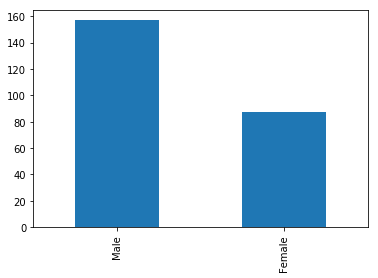

In [204]:
tips.sex.value_counts().plot.bar()

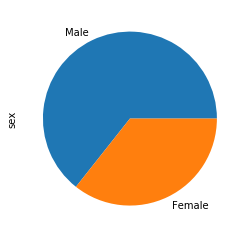

In [205]:
tips.sex.value_counts().plot.pie()

unique : 카테고리에서 사용하는 것들을 볼 수 있다.

In [206]:
tips.sex.unique()

[Female, Male]
Categories (2, object): [Female, Male]

nunique : 카테고리 유니크 개수
- n: number에서의 n

In [33]:
tips.sex.nunique()

2

카테고리는 .cat쓰면 추가 기능이 나온다. object는 .str

In [34]:
t = tips.sex.cat

tab 해서 자동 완성으로 무엇을 쓸 수 있는지 확인

In [ ]:
t.

문자열로 관리하는 것 보다 내부적으로 숫자를 써서 관리하는 것이 좋다.
- 기계학습에서 문자열 안 쓴다. -> codes를 사용하면 카테고리는 내부적으로 어떻게 관리하는지 볼 수 있다.

In [210]:
t.codes

0      1
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     0
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
214    1
215    1
216    0
217    0
218    0
219    1
220    0
221    1
222    0
223    1
224    0
225    1
226    1
227    0
228    0
229    1
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    1
239    0
240    1
241    0
242    0
243    1
Length: 244, dtype: int8

In [215]:
tips.size_ = tips['size_'].astype('category')

mpg 데이터
- 연비측정

In [221]:
mpg = sns.load_dataset('mpg')

In [223]:
mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
5    15.0          8         429.0       198.0    4341          10.0   
6    14.0          8         454.0       220.0    4354           9.0   
7    14.0          8         440.0       215.0    4312           8.5   
8    14.0          8         455.0       225.0    4425          10.0   
9    15.0          8         390.0       190.0    3850           8.5   
10   15.0          8         383.0       170.0    3563          10.0   
11   14.0          8         340.0       160.0    3609           8.0   
12   15.0          8         400.0       150.0    3761           9.5   
13   14.0          8         455.0       225.0    3086          10.0   
14   24.0          4         113.0        95.0    2372          15.0   
15   22.0          6         198.0        95.0    2833          15.5   
16   18.0          6         199.0        97.0    2774          15.5   
17   21.0          6         200.0        85.0    2587          16.0   
18   27.0          4          97.0        88.0    2130          14.5   
19   26.0          4          97.0        46.0    1835          20.5   
20   25.0          4         110.0        87.0    2672          17.5   
21   24.0          4         107.0        90.0    2430          14.5   
22   25.0          4         104.0        95.0    2375          17.5   
23   26.0          4         121.0       113.0    2234          12.5   
24   21.0          6         199.0        90.0    2648          15.0   
25   10.0          8         360.0       215.0    4615          14.0   
26   10.0          8         307.0       200.0    4376          15.0   
27   11.0          8         318.0       210.0    4382          13.5   
28    9.0          8         304.0       193.0    4732          18.5   
29   27.0          4          97.0        88.0    2130          14.5   
..    ...        ...           ...         ...     ...           ...   
368  27.0          4         112.0        88.0    2640          18.6   
369  34.0          4         112.0        88.0    2395          18.0   
370  31.0          4         112.0        85.0    2575          16.2   
371  29.0          4         135.0        84.0    2525          16.0   
372  27.0          4         151.0        90.0    2735          18.0   
373  24.0          4         140.0        92.0    2865          16.4   
374  23.0          4         151.0         NaN    3035          20.5   
375  36.0          4         105.0        74.0    1980          15.3   
376  37.0          4          91.0        68.0    2025          18.2   
377  31.0          4          91.0        68.0    1970          17.6   
378  38.0          4         105.0        63.0    2125          14.7   
379  36.0          4          98.0        70.0    2125          17.3   
380  36.0          4         120.0        88.0    2160          14.5   
381  36.0          4         107.0        75.0    2205          14.5   
382  34.0          4         108.0        70.0    2245          16.9   
383  38.0          4          91.0        67.0    1965          15.0   
384  32.0          4          91.0        67.0    1965          15.7   
385  38.0          4          91.0        67.0    1995          16.2   
386  25.0          6         181.0       110.0    2945          16.4   
387  38.0          6         262.0        85.0    3015          17.0   
388  26.0          4         156.0        92.0    2585          14.5   
389  22.0          6         232.0       112.0    2835          14.7   
390  32.0          4         144.0        96.0    2665          13.9   
391  36.0          4         135.0        84.0

mpg에는 horsepower에 미싱데이터가 존재한다.

In [224]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


데이터의 부분을 보는 명령어
- head() 앞에서 5개
- tail() 뒤에서 5개
- sample() 랜덤하게

head, tail, sample에 .describe()해서 데이터가 일정하게? 모아졌는지 확인한다.

In [228]:
mpg.head().describe()

mpg  cylinders  displacement  horsepower       weight  \
count   5.00000        5.0      5.000000    5.000000     5.000000   
mean   16.80000        8.0    316.200000  147.000000  3503.000000   
std     1.30384        0.0     19.879638   13.038405   110.006818   
min    15.00000        8.0    302.000000  130.000000  3433.000000   
25%    16.00000        8.0    304.000000  140.000000  3436.000000   
50%    17.00000        8.0    307.000000  150.000000  3449.000000   
75%    18.00000        8.0    318.000000  150.000000  3504.000000   
max    18.00000        8.0    350.000000  165.000000  3693.000000   

       acceleration  model_year  
count       5.00000         5.0  
mean       11.40000        70.0  
std         0.65192         0.0  
min        10.50000        70.0  
25%        11.00000        70.0  
50%        11.50000        70.0  
75%        12.00000        70.0  
max        12.00000        70.0

In [229]:
mpg.tail().describe()

mpg  cylinders  displacement  horsepower       weight  \
count   5.00000        5.0      5.000000    5.000000     5.000000   
mean   32.40000        4.0    122.200000   76.600000  2512.000000   
std     6.80441        0.0     16.813685   13.992855   285.626504   
min    27.00000        4.0     97.000000   52.000000  2130.000000   
25%    28.00000        4.0    119.000000   79.000000  2295.000000   
50%    31.00000        4.0    120.000000   82.000000  2625.000000   
75%    32.00000        4.0    135.000000   84.000000  2720.000000   
max    44.00000        4.0    140.000000   86.000000  2790.000000   

       acceleration  model_year  
count      5.000000         5.0  
mean      17.960000        82.0  
std        4.811237         0.0  
min       11.600000        82.0  
25%       15.600000        82.0  
50%       18.600000        82.0  
75%       19.400000        82.0  
max       24.600000        82.0

In [226]:
mpg.sample(10)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
286  17.6          8         302.0       129.0    3725          13.4   
82   23.0          4         120.0        97.0    2506          14.5   
60   20.0          4         140.0        90.0    2408          19.5   
74   13.0          8         302.0       140.0    4294          16.0   
40   14.0          8         351.0       153.0    4154          13.5   
129  31.0          4          79.0        67.0    1950          19.0   
380  36.0          4         120.0        88.0    2160          14.5   
161  16.0          6         250.0       105.0    3897          18.5   
282  22.3          4         140.0        88.0    2890          17.3   
326  43.4          4          90.0        48.0    2335          23.7   

     model_year  origin                         name  
286          79     usa              ford ltd landau  
82           72   japan  toyouta corona mark ii (sw)  
60           72     usa               chevrolet vega  
74           72     usa        ford gran torino (sw)  
40           71     usa             ford galaxie 500  
129          74   japan                  datsun b210  
380          82   japan             nissan stanza xe  
161          75     usa    chevroelt chevelle malibu  
282          79     usa              ford fairmont 4  
326          80  europe           vw dasher (diesel)

빈 값만 보고 싶은데 내부적으로는 볼 수 없어서 외부의 힘을 빌린다.

In [230]:
!pip install missingno

In [231]:
import missingno as mino

In [232]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

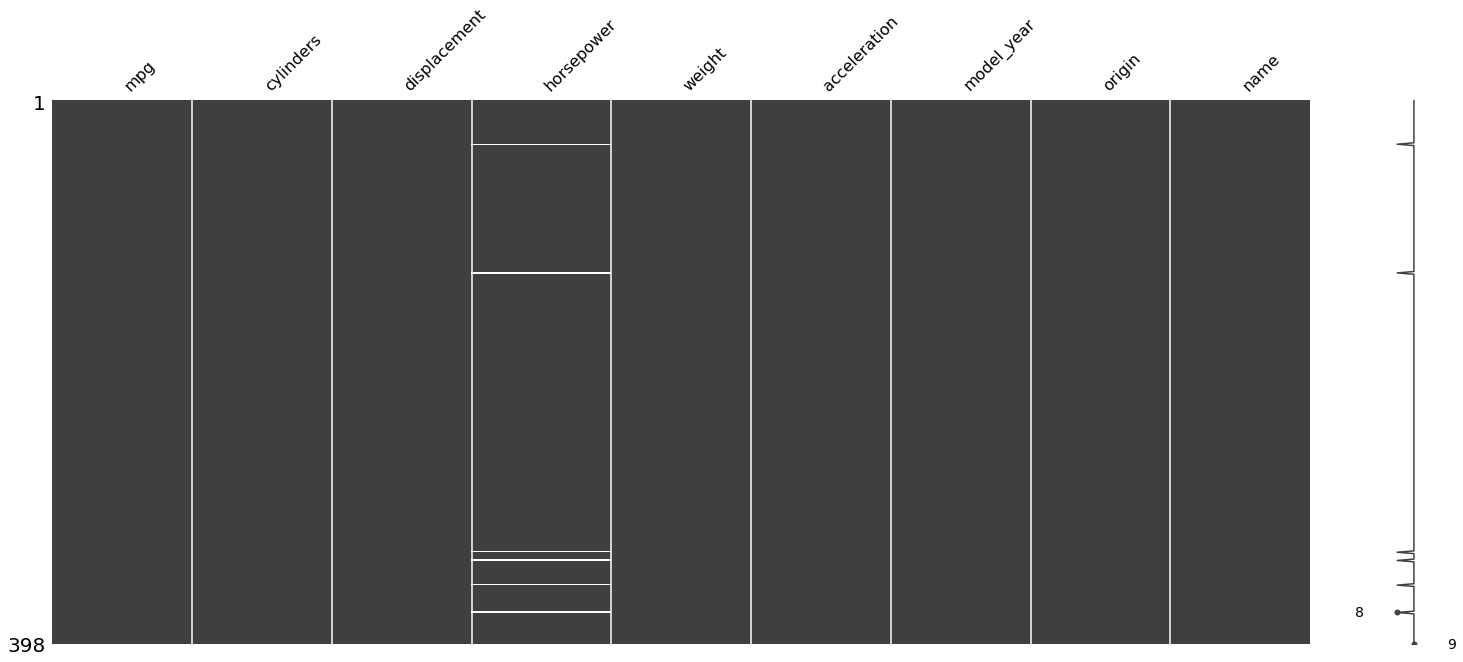

In [233]:
mino.matrix(mpg)

heatmap은 버그가 있다. 데이터가 크면 안 나오는 경우가 있다.

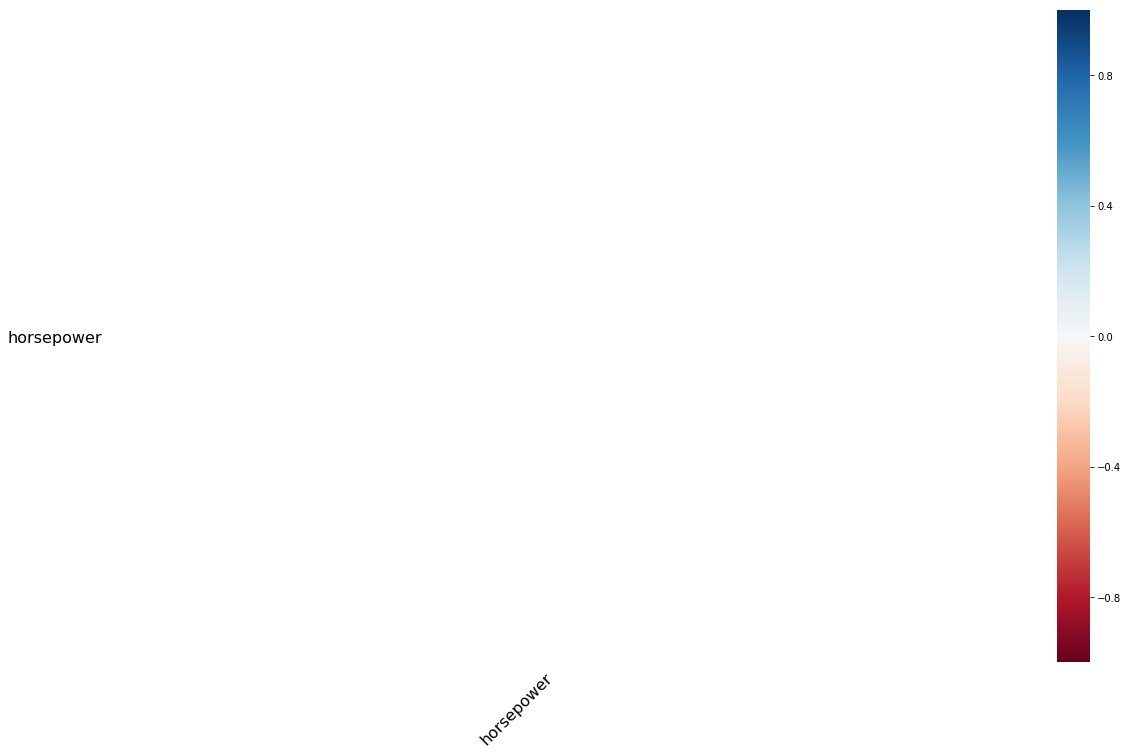

In [236]:
mino.heatmap(mpg)

isna -> True/ False로 나오는 것 -> predicate
- 마스킹 기법으로 찾아낼 수 있다.

In [240]:
mpg[mpg['horsepower'].isna()]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl

In [242]:
mpg.horsepower.isna().sum()

6

In [243]:
pd.isna == pd.isnull

True

In [244]:
pd.isna is pd.isnull

True

### 미싱데이터 처리
1. 삭제
2. 가짜 데이터로 채우기

화끈하게 버리는 방법! - 좋은 방법은 아님

In [246]:
mpg.dropna(inplace=True)

특정값(가짜 데이터) 넣는 방법
- fillna

In [248]:
mpg = sns.load_dataset('mpg')

In [249]:
mpg[mpg['horsepower'].isna()]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl

In [252]:
mpg.fillna(3).loc[32]

mpg                     25
cylinders                4
displacement            98
horsepower               3
weight                2046
acceleration            19
model_year              71
origin                 usa
name            ford pinto
Name: 32, dtype: object

.T하면 인덱스와 컬럼을 스위치~~

In [254]:
mpg.describe().T

count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
horsepower    392.0   104.469388   38.491160    46.0    75.000    93.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model_year    398.0    76.010050    3.697627    70.0    73.000    76.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
horsepower     126.000   230.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model_year      79.000    82.0

#### 판다스에서 컬럼 뽑아내는 최소 5가지 방법
1. 키 방식
2. 어트리뷰트 방식
3. 팬시 인덱스
4. filter
5. select

In [258]:
mpg[mpg.columns[:-2]]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
5    15.0          8         429.0       198.0    4341          10.0   
6    14.0          8         454.0       220.0    4354           9.0   
7    14.0          8         440.0       215.0    4312           8.5   
8    14.0          8         455.0       225.0    4425          10.0   
9    15.0          8         390.0       190.0    3850           8.5   
10   15.0          8         383.0       170.0    3563          10.0   
11   14.0          8         340.0       160.0    3609           8.0   
12   15.0          8         400.0       150.0    3761           9.5   
13   14.0          8         455.0       225.0    3086          10.0   
14   24.0          4         113.0        95.0    2372          15.0   
15   22.0          6         198.0        95.0    2833          15.5   
16   18.0          6         199.0        97.0    2774          15.5   
17   21.0          6         200.0        85.0    2587          16.0   
18   27.0          4          97.0        88.0    2130          14.5   
19   26.0          4          97.0        46.0    1835          20.5   
20   25.0          4         110.0        87.0    2672          17.5   
21   24.0          4         107.0        90.0    2430          14.5   
22   25.0          4         104.0        95.0    2375          17.5   
23   26.0          4         121.0       113.0    2234          12.5   
24   21.0          6         199.0        90.0    2648          15.0   
25   10.0          8         360.0       215.0    4615          14.0   
26   10.0          8         307.0       200.0    4376          15.0   
27   11.0          8         318.0       210.0    4382          13.5   
28    9.0          8         304.0       193.0    4732          18.5   
29   27.0          4          97.0        88.0    2130          14.5   
..    ...        ...           ...         ...     ...           ...   
368  27.0          4         112.0        88.0    2640          18.6   
369  34.0          4         112.0        88.0    2395          18.0   
370  31.0          4         112.0        85.0    2575          16.2   
371  29.0          4         135.0        84.0    2525          16.0   
372  27.0          4         151.0        90.0    2735          18.0   
373  24.0          4         140.0        92.0    2865          16.4   
374  23.0          4         151.0         NaN    3035          20.5   
375  36.0          4         105.0        74.0    1980          15.3   
376  37.0          4          91.0        68.0    2025          18.2   
377  31.0          4          91.0        68.0    1970          17.6   
378  38.0          4         105.0        63.0    2125          14.7   
379  36.0          4          98.0        70.0    2125          17.3   
380  36.0          4         120.0        88.0    2160          14.5   
381  36.0          4         107.0        75.0    2205          14.5   
382  34.0          4         108.0        70.0    2245          16.9   
383  38.0          4          91.0        67.0    1965          15.0   
384  32.0          4          91.0        67.0    1965          15.7   
385  38.0          4          91.0        67.0    1995          16.2   
386  25.0          6         181.0       110.0    2945          16.4   
387  38.0          6         262.0        85.0    3015          17.0   
388  26.0          4         156.0        92.0    2585          14.5   
389  22.0          6         232.0       112.0    2835          14.7   
390  32.0          4         144.0        96.0    2665          13.9   
391  36.0          4         135.0        84.0

In [259]:
mpg[mpg.columns[1:4]]

cylinders  displacement  horsepower
0            8         307.0       130.0
1            8         350.0       165.0
2            8         318.0       150.0
3            8         304.0       150.0
4            8         302.0       140.0
5            8         429.0       198.0
6            8         454.0       220.0
7            8         440.0       215.0
8            8         455.0       225.0
9            8         390.0       190.0
10           8         383.0       170.0
11           8         340.0       160.0
12           8         400.0       150.0
13           8         455.0       225.0
14           4         113.0        95.0
15           6         198.0        95.0
16           6         199.0        97.0
17           6         200.0        85.0
18           4          97.0        88.0
19           4          97.0        46.0
20           4         110.0        87.0
21           4         107.0        90.0
22           4         104.0        95.0
23           4         121.0       113.0
24           6         199.0        90.0
25           8         360.0       215.0
26           8         307.0       200.0
27           8         318.0       210.0
28           8         304.0       193.0
29           4          97.0        88.0
..         ...           ...         ...
368          4         112.0        88.0
369          4         112.0        88.0
370          4         112.0        85.0
371          4         135.0        84.0
372          4         151.0        90.0
373          4         140.0        92.0
374          4         151.0         NaN
375          4         105.0        74.0
376          4          91.0        68.0
377          4          91.0        68.0
378          4         105.0        63.0
379          4          98.0        70.0
380          4         120.0        88.0
381          4         107.0        75.0
382          4         108.0        70.0
383          4          91.0        67.0
384          4          91.0        67.0
385          4          91.0        67.0
386          6         181.0       110.0
387          6         262.0        85.0
388          4         156.0        92.0
389          6         232.0       112.0
390          4         144.0        96.0
391          4         135.0        84.0
392          4         151.0        90.0
393          4         140.0        86.0
394          4          97.0        52.0
395          4         135.0        84.0
396          4         120.0        79.0
397          4         119.0        82.0

[398 rows x 3 columns]

In [276]:
mpg.filter(regex="([^weight]+)")

mpg  cylinders  displacement  horsepower  acceleration  model_year  \
0    18.0          8         307.0       130.0          12.0          70   
1    15.0          8         350.0       165.0          11.5          70   
2    18.0          8         318.0       150.0          11.0          70   
3    16.0          8         304.0       150.0          12.0          70   
4    17.0          8         302.0       140.0          10.5          70   
5    15.0          8         429.0       198.0          10.0          70   
6    14.0          8         454.0       220.0           9.0          70   
7    14.0          8         440.0       215.0           8.5          70   
8    14.0          8         455.0       225.0          10.0          70   
9    15.0          8         390.0       190.0           8.5          70   
10   15.0          8         383.0       170.0          10.0          70   
11   14.0          8         340.0       160.0           8.0          70   
12   15.0          8         400.0       150.0           9.5          70   
13   14.0          8         455.0       225.0          10.0          70   
14   24.0          4         113.0        95.0          15.0          70   
15   22.0          6         198.0        95.0          15.5          70   
16   18.0          6         199.0        97.0          15.5          70   
17   21.0          6         200.0        85.0          16.0          70   
18   27.0          4          97.0        88.0          14.5          70   
19   26.0          4          97.0        46.0          20.5          70   
20   25.0          4         110.0        87.0          17.5          70   
21   24.0          4         107.0        90.0          14.5          70   
22   25.0          4         104.0        95.0          17.5          70   
23   26.0          4         121.0       113.0          12.5          70   
24   21.0          6         199.0        90.0          15.0          70   
25   10.0          8         360.0       215.0          14.0          70   
26   10.0          8         307.0       200.0          15.0          70   
27   11.0          8         318.0       210.0          13.5          70   
28    9.0          8         304.0       193.0          18.5          70   
29   27.0          4          97.0        88.0          14.5          71   
..    ...        ...           ...         ...           ...         ...   
368  27.0          4         112.0        88.0          18.6          82   
369  34.0          4         112.0        88.0          18.0          82   
370  31.0          4         112.0        85.0          16.2          82   
371  29.0          4         135.0        84.0          16.0          82   
372  27.0          4         151.0        90.0          18.0          82   
373  24.0          4         140.0        92.0          16.4          82   
374  23.0          4         151.0         NaN          20.5          82   
375  36.0          4         105.0        74.0          15.3          82   
376  37.0          4          91.0        68.0          18.2          82   
377  31.0          4          91.0        68.0          17.6          82   
378  38.0          4         105.0        63.0          14.7          82   
379  36.0          4          98.0        70.0          17.3          82   
380  36.0          4         120.0        88.0          14.5          82   
381  36.0          4         107.0        75.0          14.5          82   
382  34.0          4         108.0        70.0          16.9          82   
383  38.0          4          91.0        67.0          15.0          82   
384  32.0          4          91.0        67.0          15.7          82   
385  38.0          4          91.0        67.0          16.2          82   
386  25.0          6         181.0       110.0          16.4          82   
387  38.0          6         262.0        85.0          17.0          82   
388  26.0          4         156.0        92.0        

In [267]:
mpg[mpg.columns[:]]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
5    15.0          8         429.0       198.0    4341          10.0   
6    14.0          8         454.0       220.0    4354           9.0   
7    14.0          8         440.0       215.0    4312           8.5   
8    14.0          8         455.0       225.0    4425          10.0   
9    15.0          8         390.0       190.0    3850           8.5   
10   15.0          8         383.0       170.0    3563          10.0   
11   14.0          8         340.0       160.0    3609           8.0   
12   15.0          8         400.0       150.0    3761           9.5   
13   14.0          8         455.0       225.0    3086          10.0   
14   24.0          4         113.0        95.0    2372          15.0   
15   22.0          6         198.0        95.0    2833          15.5   
16   18.0          6         199.0        97.0    2774          15.5   
17   21.0          6         200.0        85.0    2587          16.0   
18   27.0          4          97.0        88.0    2130          14.5   
19   26.0          4          97.0        46.0    1835          20.5   
20   25.0          4         110.0        87.0    2672          17.5   
21   24.0          4         107.0        90.0    2430          14.5   
22   25.0          4         104.0        95.0    2375          17.5   
23   26.0          4         121.0       113.0    2234          12.5   
24   21.0          6         199.0        90.0    2648          15.0   
25   10.0          8         360.0       215.0    4615          14.0   
26   10.0          8         307.0       200.0    4376          15.0   
27   11.0          8         318.0       210.0    4382          13.5   
28    9.0          8         304.0       193.0    4732          18.5   
29   27.0          4          97.0        88.0    2130          14.5   
..    ...        ...           ...         ...     ...           ...   
368  27.0          4         112.0        88.0    2640          18.6   
369  34.0          4         112.0        88.0    2395          18.0   
370  31.0          4         112.0        85.0    2575          16.2   
371  29.0          4         135.0        84.0    2525          16.0   
372  27.0          4         151.0        90.0    2735          18.0   
373  24.0          4         140.0        92.0    2865          16.4   
374  23.0          4         151.0         NaN    3035          20.5   
375  36.0          4         105.0        74.0    1980          15.3   
376  37.0          4          91.0        68.0    2025          18.2   
377  31.0          4          91.0        68.0    1970          17.6   
378  38.0          4         105.0        63.0    2125          14.7   
379  36.0          4          98.0        70.0    2125          17.3   
380  36.0          4         120.0        88.0    2160          14.5   
381  36.0          4         107.0        75.0    2205          14.5   
382  34.0          4         108.0        70.0    2245          16.9   
383  38.0          4          91.0        67.0    1965          15.0   
384  32.0          4          91.0        67.0    1965          15.7   
385  38.0          4          91.0        67.0    1995          16.2   
386  25.0          6         181.0       110.0    2945          16.4   
387  38.0          6         262.0        85.0    3015          17.0   
388  26.0          4         156.0        92.0    2585          14.5   
389  22.0          6         232.0       112.0    2835          14.7   
390  32.0          4         144.0        96.0    2665          13.9   
391  36.0          4         135.0        84.0

In [271]:
mpg.filter(regex="([^weight]+)").describe().T

count        mean         std   min      25%    50%      75%  \
mpg           398.0   23.514573    7.815984   9.0   17.500   23.0   29.000   
cylinders     398.0    5.454774    1.701004   3.0    4.000    4.0    8.000   
displacement  398.0  193.425879  104.269838  68.0  104.250  148.5  262.000   
horsepower    392.0  104.469388   38.491160  46.0   75.000   93.5  126.000   
acceleration  398.0   15.568090    2.757689   8.0   13.825   15.5   17.175   
model_year    398.0   76.010050    3.697627  70.0   73.000   76.0   79.000   

                max  
mpg            46.6  
cylinders       8.0  
displacement  455.0  
horsepower    230.0  
acceleration   24.8  
model_year     82.0

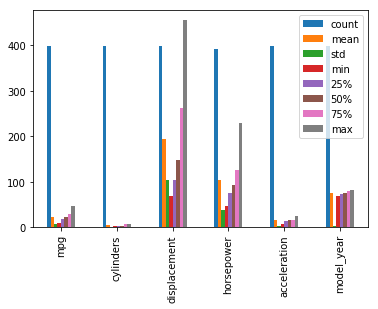

In [273]:
mpg.filter(regex="([^weight]+)").describe().T.plot.bar();

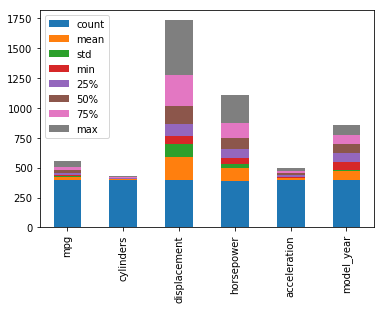

In [274]:
mpg.filter(regex="([^weight]+)").describe().T.plot.bar(stacked=True);

일자 점 -> 카테고리 데이터 -> regration? 데이터일 때는 pairplot이 별로 소용 없다.

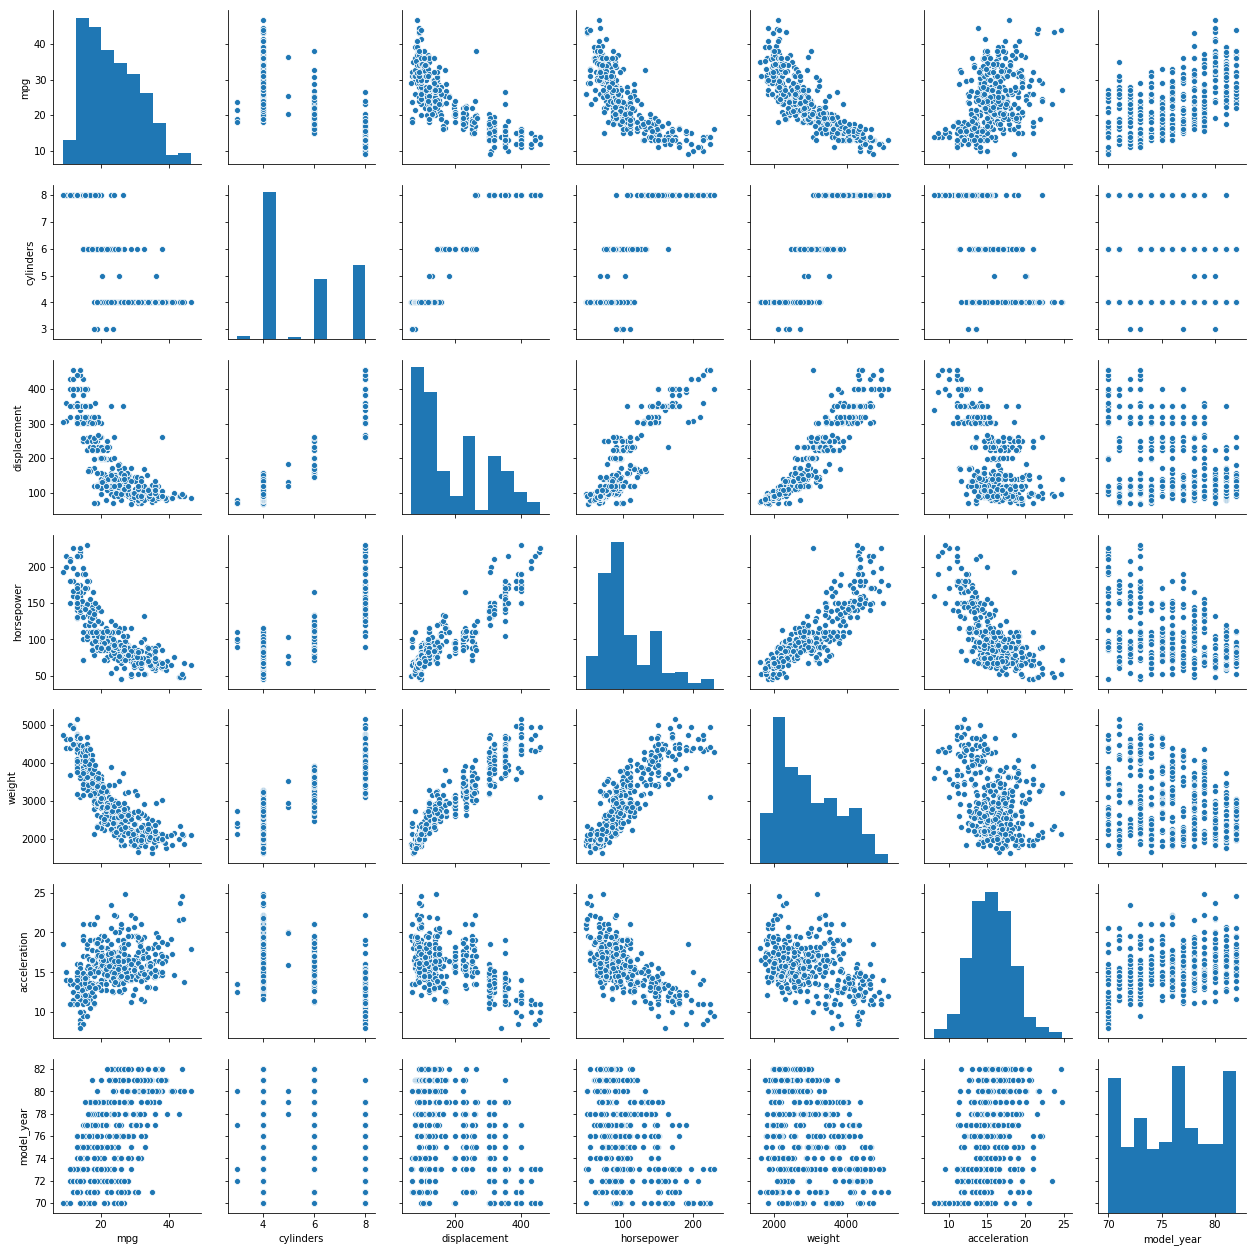

In [277]:
sns.pairplot(mpg)

상관 분석
- 공분산(cov)
- 상관계수(corr)
- pearson, kendall, spearman

In [278]:
mpg.corr()
# 1에 가까울 수록 관련이 있다는 의미

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000

다중공선성?
- feature selection에 사용한다.

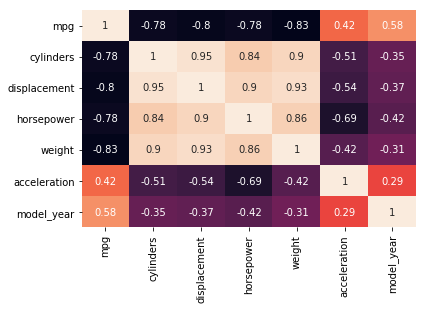

In [283]:
sns.heatmap(mpg.corr(), annot=True, cbar=False);

아웃라이어 -> 박스 플랏에서 최대값 밖에 있는것.
- 어떻게 없앨까? OutlierDetection -> pyod 패키지
- 중요한 데이터일 가능성이 있다... 무조건 없애면 안됨.
- 성능을 떨어트리는 원인이 될 수 있다.
- normalization 해야 하는지를 박스플랏에서 캐치해야된다. (박스 크기차이..? 막대 크기 차이..? 암튼 크기 차이가 많이나면 필요!)

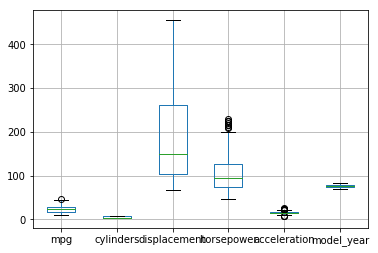

In [286]:
mpg.filter(regex="([^weight]+)").boxplot();

In [287]:
mpg.describe([.00005,.5,.75])

mpg   cylinders  displacement  horsepower       weight  \
count   398.000000  398.000000    398.000000  392.000000   398.000000   
mean     23.514573    5.454774    193.425879  104.469388  2970.424623   
std       7.815984    1.701004    104.269838   38.491160   846.841774   
min       9.000000    3.000000     68.000000   46.000000  1613.000000   
0.005%    9.019850    3.000000     68.039700   46.000000  1613.714600   
50%      23.000000    4.000000    148.500000   93.500000  2803.500000   
75%      29.000000    8.000000    262.000000  126.000000  3608.000000   
max      46.600000    8.000000    455.000000  230.000000  5140.000000   

        acceleration  model_year  
count     398.000000  398.000000  
mean       15.568090   76.010050  
std         2.757689    3.697627  
min         8.000000   70.000000  
0.005%      8.009925   70.000000  
50%        15.500000   76.000000  
75%        17.175000   79.000000  
max        24.800000   82.000000

모든 데이터 공통 처리
### ------------------------------------------------------------------------------------------------
데이터마다 처리해야 될 것들이 있다.

In [35]:
pew = pd.read_csv("./tidy-data-master/data/pew.txt", delimiter='\t')

잘 못만들은 데이터 -> 200k를 추가하려면 스키마를 추가해야 하므로 안 좋음

pew는 wide format -> 사람이 보기 좋은 형태
- groupby, describe 별 의미가 없다.

In [293]:
pew

religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  \
0                  Agnostic     27       34       60       81       76   
1                   Atheist     12       27       37       52       35   
2                  Buddhist     27       21       30       34       33   
3                  Catholic    418      617      732      670      638   
4        Don’t know/refused     15       14       15       11       10   
5          Evangelical Prot    575      869     1064      982      881   
6                     Hindu      1        9        7        9       11   
7   Historically Black Prot    228      244      236      238      197   
8         Jehovah's Witness     20       27       24       24       21   
9                    Jewish     19       19       25       25       30   
10            Mainline Prot    289      495      619      655      651   
11                   Mormon     29       40       48       51       56   
12                   Muslim      6        7        9       10        9   
13                 Orthodox     13       17       23       32       32   
14          Other Christian      9        7       11       13       13   
15             Other Faiths     20       33       40       46       49   
16    Other World Religions      5        2        3        4        2   
17             Unaffiliated    217      299      374      365      341   

    $50-75k  $75-100k  $100-150k  >150k  Don't know/refused  
0       137       122        109     84                  96  
1        70        73         59     74                  76  
2        58        62         39     53                  54  
3      1116       949        792    633                1489  
4        35        21         17     18                 116  
5      1486       949        723    414                1529  
6        34        47         48     54                  37  
7       223       131         81     78                 339  
8        30        15         11      6                  37  
9        95        69         87    151                 162  
10     1107       939        753    634                1328  
11      112        85         49     42                  69  
12       23        16          8      6                  22  
13       47        38         42     46                  73  
14       14        18         14     12                  18  
15       63        46         40     41                  71  
16        7         3          4      4                   8  
17      528       407        321    258                 597

long format : 분석용으로 쓰는 포맷
- melt(고정할 컬럼)해서 사용
    - tidy 데이터가 아니면 melt 사용해서 tidy 데이터로 만들어준다.
    - 고정하고 싶을 때 사용
- 의미 있는 값을 가질 수 있다.

In [297]:
pew = pew.melt(['religion'])

In [298]:
pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
religion    180 non-null object
variable    180 non-null object
value       180 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [299]:
pew.describe()

value
count   180.000000
mean    197.533333
std     326.548693
min       1.000000
25%      18.000000
50%      46.000000
75%     218.500000
max    1529.000000

In [300]:
pew.groupby('variable').mean()

value
variable                      
$10-20k             154.500000
$100-150k           177.611111
$20-30k             186.500000
$30-40k             183.444444
$40-50k             171.388889
$50-75k             288.055556
$75-100k            221.666667
<$10k               107.222222
>150k               144.888889
Don't know/refused  340.055556

In [36]:
weather = pd.read_csv("./tidy-data-master/data/weather.txt", delimiter="\t", na_values="-")

In [37]:
weather

id  year  month element     d1     d2     d3     d4     d5  \
0   MX000017004  2010      1    TMAX    NaN    NaN    NaN    NaN    NaN   
1   MX000017004  2010      1    TMIN    NaN    NaN    NaN    NaN    NaN   
2   MX000017004  2010      2    TMAX    NaN  273.0  241.0    NaN    NaN   
3   MX000017004  2010      2    TMIN    NaN  144.0  144.0    NaN    NaN   
4   MX000017004  2010      3    TMAX    NaN    NaN    NaN    NaN  321.0   
5   MX000017004  2010      3    TMIN    NaN    NaN    NaN    NaN  142.0   
6   MX000017004  2010      4    TMAX    NaN    NaN    NaN    NaN    NaN   
7   MX000017004  2010      4    TMIN    NaN    NaN    NaN    NaN    NaN   
8   MX000017004  2010      5    TMAX    NaN    NaN    NaN    NaN    NaN   
9   MX000017004  2010      5    TMIN    NaN    NaN    NaN    NaN    NaN   
10  MX000017004  2010      6    TMAX    NaN    NaN    NaN    NaN    NaN   
11  MX000017004  2010      6    TMIN    NaN    NaN    NaN    NaN    NaN   
12  MX000017004  2010      7    TMAX    NaN    NaN  286.0    NaN    NaN   
13  MX000017004  2010      7    TMIN    NaN    NaN  175.0    NaN    NaN   
14  MX000017004  2010      8    TMAX    NaN    NaN    NaN    NaN  296.0   
15  MX000017004  2010      8    TMIN    NaN    NaN    NaN    NaN  158.0   
16  MX000017004  2010     10    TMAX    NaN    NaN    NaN    NaN  270.0   
17  MX000017004  2010     10    TMIN    NaN    NaN    NaN    NaN  140.0   
18  MX000017004  2010     11    TMAX    NaN  313.0    NaN  272.0  263.0   
19  MX000017004  2010     11    TMIN    NaN  163.0    NaN  120.0   79.0   
20  MX000017004  2010     12    TMAX  299.0    NaN    NaN    NaN    NaN   
21  MX000017004  2010     12    TMIN  138.0    NaN    NaN    NaN    NaN   

       d6  ...  d22    d23  d24    d25    d26    d27    d28    d29    d30  \
0     NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN  278.0   
1     NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN  145.0   
2     NaN  ...  NaN  299.0  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     NaN  ...  NaN  107.0  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4     NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5     NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6     NaN  ...  NaN    NaN  NaN    NaN    NaN  363.0    NaN    NaN    NaN   
7     NaN  ...  NaN    NaN  NaN    NaN    NaN  167.0    NaN    NaN    NaN   
8     NaN  ...  NaN    NaN  NaN    NaN    NaN  332.0    NaN    NaN    NaN   
9     NaN  ...  NaN    NaN  NaN    NaN    NaN  182.0    NaN    NaN    NaN   
10    NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN  301.0    NaN   
11    NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN  180.0    NaN   
12    NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13    NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
14    NaN  ...  NaN  264.0  NaN  297.0    NaN    NaN    NaN  280.0    NaN   
15    NaN  ...  NaN  150.0  NaN  156.0    NaN    NaN    NaN  153.0    NaN   
16    NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN  312.0    NaN    NaN   
17    NaN  ...  NaN    NaN  NaN    NaN    NaN    NaN  150.0    NaN    NaN   
18    NaN  ...  NaN    NaN  NaN    NaN  281.0  277.0    NaN    NaN    NaN   
19    NaN  ...  NaN    NaN  NaN    NaN  121.0  142.0    NaN    NaN    NaN   
20  278.0  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21  105.0  ...  NaN    NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      d31  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  
9     NaN  
10    NaN  
11    NaN  
12    NaN  
13    NaN  
14  254.0  
15  154.0  
16    NaN  
17    NaN  
18    NaN  
19    NaN  
20    NaN  
21    NaN  

[22 rows x 35 columns]

In [330]:
weather = weather.melt(weather.columns[:4], var_name="day").dropna()

In [331]:
weather.describe()

year      month       value
count    66.0  66.000000   66.000000
mean   2010.0   7.212121  219.212121
std       0.0   3.417220   77.294744
min    2010.0   1.000000   79.000000
25%    2010.0   4.000000  150.000000
50%    2010.0   8.000000  211.500000
75%    2010.0  10.000000  289.250000
max    2010.0  12.000000  363.000000

In [332]:
weather

id  year  month element  day  value
20   MX000017004  2010     12    TMAX   d1  299.0
21   MX000017004  2010     12    TMIN   d1  138.0
24   MX000017004  2010      2    TMAX   d2  273.0
25   MX000017004  2010      2    TMIN   d2  144.0
40   MX000017004  2010     11    TMAX   d2  313.0
41   MX000017004  2010     11    TMIN   d2  163.0
46   MX000017004  2010      2    TMAX   d3  241.0
47   MX000017004  2010      2    TMIN   d3  144.0
56   MX000017004  2010      7    TMAX   d3  286.0
57   MX000017004  2010      7    TMIN   d3  175.0
84   MX000017004  2010     11    TMAX   d4  272.0
85   MX000017004  2010     11    TMIN   d4  120.0
92   MX000017004  2010      3    TMAX   d5  321.0
93   MX000017004  2010      3    TMIN   d5  142.0
102  MX000017004  2010      8    TMAX   d5  296.0
103  MX000017004  2010      8    TMIN   d5  158.0
104  MX000017004  2010     10    TMAX   d5  270.0
105  MX000017004  2010     10    TMIN   d5  140.0
106  MX000017004  2010     11    TMAX   d5  263.0
107  MX000017004  2010     11    TMIN   d5   79.0
130  MX000017004  2010     12    TMAX   d6  278.0
131  MX000017004  2010     12    TMIN   d6  105.0
148  MX000017004  2010     10    TMAX   d7  281.0
149  MX000017004  2010     10    TMIN   d7  129.0
168  MX000017004  2010      8    TMAX   d8  290.0
169  MX000017004  2010      8    TMIN   d8  173.0
202  MX000017004  2010      3    TMAX  d10  345.0
203  MX000017004  2010      3    TMIN  d10  168.0
222  MX000017004  2010      2    TMAX  d11  297.0
223  MX000017004  2010      2    TMIN  d11  134.0
..           ...   ...    ...     ...  ...    ...
324  MX000017004  2010     10    TMAX  d15  287.0
325  MX000017004  2010     10    TMIN  d15  105.0
334  MX000017004  2010      3    TMAX  d16  311.0
335  MX000017004  2010      3    TMIN  d16  176.0
362  MX000017004  2010      6    TMAX  d17  280.0
363  MX000017004  2010      6    TMIN  d17  175.0
486  MX000017004  2010      2    TMAX  d23  299.0
487  MX000017004  2010      2    TMIN  d23  107.0
498  MX000017004  2010      8    TMAX  d23  264.0
499  MX000017004  2010      8    TMIN  d23  150.0
542  MX000017004  2010      8    TMAX  d25  297.0
543  MX000017004  2010      8    TMIN  d25  156.0
568  MX000017004  2010     11    TMAX  d26  281.0
569  MX000017004  2010     11    TMIN  d26  121.0
578  MX000017004  2010      4    TMAX  d27  363.0
579  MX000017004  2010      4    TMIN  d27  167.0
580  MX000017004  2010      5    TMAX  d27  332.0
581  MX000017004  2010      5    TMIN  d27  182.0
590  MX000017004  2010     11    TMAX  d27  277.0
591  MX000017004  2010     11    TMIN  d27  142.0
610  MX000017004  2010     10    TMAX  d28  312.0
611  MX000017004  2010     10    TMIN  d28  150.0
626  MX000017004  2010      6    TMAX  d29  301.0
627  MX000017004  2010      6    TMIN  d29  180.0
630  MX000017004  2010      8    TMAX  d29  280.0
631  MX000017004  2010      8    TMIN  d29  153.0
638  MX000017004  2010      1    TMAX  d30  278.0
639  MX000017004  2010      1    TMIN  d30  145.0
674  MX000017004  2010      8    TMAX  d31  254.0
675  MX000017004  2010      8    TMIN  d31  154.0

[66 rows x 6 columns]

year , id 의미 없음 -> 지워 버리자!

In [333]:
weather.drop(columns=["id","year"], inplace=True)

In [334]:
weather.reset_index(drop=True, inplace=True)

In [335]:
weather.day = weather.day.str.replace('d','')

In [336]:
weather.day = weather.day.astype('int64')

In [337]:
weather.month = weather.month.astype('int64')

In [338]:
weather.sort_values('month', inplace=True)

In [339]:
weather.reset_index(drop=True, inplace=True)

In [340]:
weather

month element  day  value
0       1    TMIN   30  145.0
1       1    TMAX   30  278.0
2       2    TMIN   23  107.0
3       2    TMAX    2  273.0
4       2    TMIN    2  144.0
5       2    TMAX    3  241.0
6       2    TMIN    3  144.0
7       2    TMIN   11  134.0
8       2    TMAX   11  297.0
9       2    TMAX   23  299.0
10      3    TMIN   10  168.0
11      3    TMIN    5  142.0
12      3    TMAX   10  345.0
13      3    TMAX   16  311.0
14      3    TMIN   16  176.0
15      3    TMAX    5  321.0
16      4    TMAX   27  363.0
17      4    TMIN   27  167.0
18      5    TMAX   27  332.0
19      5    TMIN   27  182.0
20      6    TMAX   29  301.0
21      6    TMAX   17  280.0
22      6    TMIN   17  175.0
23      6    TMIN   29  180.0
24      7    TMAX   14  299.0
25      7    TMIN    3  175.0
26      7    TMAX    3  286.0
27      7    TMIN   14  165.0
28      8    TMIN   23  150.0
29      8    TMAX   25  297.0
..    ...     ...  ...    ...
36      8    TMAX   31  254.0
37      8    TMIN   13  165.0
38      8    TMAX   13  298.0
39      8    TMIN    8  173.0
40      8    TMAX    8  290.0
41      8    TMAX    5  296.0
42     10    TMIN   14  130.0
43     10    TMAX    5  270.0
44     10    TMIN    5  140.0
45     10    TMAX   14  295.0
46     10    TMAX   28  312.0
47     10    TMIN   28  150.0
48     10    TMAX    7  281.0
49     10    TMIN    7  129.0
50     10    TMIN   15  105.0
51     10    TMAX   15  287.0
52     11    TMAX    4  272.0
53     11    TMIN    4  120.0
54     11    TMIN    2  163.0
55     11    TMAX    2  313.0
56     11    TMAX    5  263.0
57     11    TMAX   27  277.0
58     11    TMIN   26  121.0
59     11    TMAX   26  281.0
60     11    TMIN    5   79.0
61     11    TMIN   27  142.0
62     12    TMAX    6  278.0
63     12    TMIN    6  105.0
64     12    TMIN    1  138.0
65     12    TMAX    1  299.0

[66 rows x 4 columns]

In [343]:
weather = pd.read_csv('./tidy-data-master/data/weather.txt', sep='\t')

melt를 자주 쓰니까 판다스에서 wide_to_long이라는 함수를 만들어서 제공한다.
- 공통 된 것을 그룹화 해줘서 melt보다 예쁘게 만들어준다.

In [346]:
pd.wide_to_long(weather, 'd', ['id', 'year', 'month', 'element'],'').dropna()

d
id          year month element          
MX000017004 2010 1     TMAX    30  278.0
                       TMIN    30  145.0
                 2     TMAX    2   273.0
                               3   241.0
                               11  297.0
                               23  299.0
                       TMIN    2   144.0
                               3   144.0
                               11  134.0
                               23  107.0
                 3     TMAX    5   321.0
                               10  345.0
                               16  311.0
                       TMIN    5   142.0
                               10  168.0
                               16  176.0
                 4     TMAX    27  363.0
                       TMIN    27  167.0
                 5     TMAX    27  332.0
                       TMIN    27  182.0
                 6     TMAX    17  280.0
                               29  301.0
                       TMIN    17  175.0
                               29  180.0
                 7     TMAX    3   286.0
                               14  299.0
                       TMIN    3   175.0
                               14  165.0
                 8     TMAX    5   296.0
                               8   290.0
...                                  ...
                       TMIN    8   173.0
                               13  165.0
                               23  150.0
                               25  156.0
                               29  153.0
                               31  154.0
                 10    TMAX    5   270.0
                               7   281.0
                               14  295.0
                               15  287.0
                               28  312.0
                       TMIN    5   140.0
                               7   129.0
                               14  130.0
                               15  105.0
                               28  150.0
                 11    TMAX    2   313.0
                               4   272.0
                               5   263.0
                               26  281.0
                               27  277.0
                       TMIN    2   163.0
                               4   120.0
                               5    79.0
                               26  121.0
                               27  142.0
                 12    TMAX    1   299.0
                               6   278.0
                       TMIN    1   138.0
                               6   105.0

[66 rows x 1 columns]

In [354]:
billboard = pd.read_csv('./tidy-data-master/data/billboard.csv', date_parser='',parse_dates=True)

In [355]:
billboard

year      artist.inverted  \
0    2000      Destiny's Child   
1    2000              Santana   
2    2000        Savage Garden   
3    2000              Madonna   
4    2000  Aguilera, Christina   
5    2000                Janet   
6    2000      Destiny's Child   
7    2000    Iglesias, Enrique   
8    2000                Sisqo   
9    2000             Lonestar   
10   2000               N'Sync   
11   2000  Aguilera, Christina   
12   2000     Vertical Horizon   
13   2000                Creed   
14   2000              Aaliyah   
15   2000      matchbox twenty   
16   2000        Carey, Mariah   
17   2000          Hill, Faith   
18   2000                  Mya   
19   2000                Dream   
20   2000        Braxton, Toni   
21   2000        Anthony, Marc   
22   2000                  98�   
23   2000      Destiny's Child   
24   2000         3 Doors Down   
25   2000                Sisqo   
26   2000  Aguilera, Christina   
27   2000     Houston, Whitney   
28   2000                  Joe   
29   2000      Jordan, Montell   
..    ...                  ...   
287  2000              2Ge+her   
288  2000       Madison Avenue   
289  2000                  Eve   
290  2000          Limp Bizkit   
291  2000      Spencer, Tracie   
292  2000            Nu Flavor   
293  2000                Tamar   
294  2000       Levert, Gerald   
295  2000           Hart, Beth   
296  2000          Diffie, Joe   
297  2000      Funkmaster Flex   
298  2000         Price, Kelly   
299  2000             En Vogue   
300  2000          Herndon, Ty   
301  2000            Anastacia   
302  2000                Trina   
303  2000              Lil' Mo   
304  2000              A*Teens   
305  2000        Sheist, Shade   
306  2000           De La Soul   
307  2000       Larrieux, Amel   
308  2000        Braxton, Toni   
309  2000              Tuesday   
310  2000            LL Cool J   
311  2000             Master P   
312  2000     Ghostface Killah   
313  2000          Smith, Will   
314  2000        Zombie Nation   
315  2000       Eastsidaz, The   
316  2000               Fragma   

                                                 track  time        genre  \
0                             Independent Women Part I  3:38         Rock   
1                                         Maria, Maria  4:18         Rock   
2                                   I Knew I Loved You  4:07         Rock   
3                                                Music  3:45         Rock   
4                Come On Over Baby (All I Want Is You)  3:38         Rock   
5                                Doesn't Really Matter  4:17         Rock   
6                                          Say My Name  4:31         Rock   
7                                          Be With You  3:36        Latin   
8                                           Incomplete  3:52         Rock   
9                                               Amazed  4:25      Country   
10                                    It's Gonna Be Me  3:10         Rock   
11                                   What A Girl Wants  3:18         Rock   
12                                 Everything You Want  4:01         Rock   
13                                 With Arms Wide Open  3:52         Rock   
14                                           Try Again  4:03         Rock   
15                                                Bent  4:12         Rock   
16                               Thank God I Found You  4:14         Rock   
17                                             Breathe  4:04          Rap   
18                   Case Of The Ex (Whatcha Gonna Do)  3:50         Rock   
19                                      He Loves U Not  3:43         Rock   
20                                He Wasn't Man Enough  4:21         Rock   
21                                      You Sang To Me  3:50        Latin   
22                  Give Me Just One Night (Una Noche)  3:24         Rock   
23                                     Jumpin' J

In [356]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

데이터 타입 고치고 이름 고치고 melt해서 tidy 데이터로 만들고 NaN값을 없앤다!

특정 데이터 타입만 뽑는 방법

In [268]:
mpg.select_dtypes('object')

origin                               name
0       usa          chevrolet chevelle malibu
1       usa                  buick skylark 320
2       usa                 plymouth satellite
3       usa                      amc rebel sst
4       usa                        ford torino
5       usa                   ford galaxie 500
6       usa                   chevrolet impala
7       usa                  plymouth fury iii
8       usa                   pontiac catalina
9       usa                 amc ambassador dpl
10      usa                dodge challenger se
11      usa                 plymouth 'cuda 340
12      usa              chevrolet monte carlo
13      usa            buick estate wagon (sw)
14    japan              toyota corona mark ii
15      usa                    plymouth duster
16      usa                         amc hornet
17      usa                      ford maverick
18    japan                       datsun pl510
19   europe       volkswagen 1131 deluxe sedan
20   europe                        peugeot 504
21   europe                        audi 100 ls
22   europe                           saab 99e
23   europe                           bmw 2002
24      usa                        amc gremlin
25      usa                          ford f250
26      usa                          chevy c20
27      usa                         dodge d200
28      usa                           hi 1200d
29    japan                       datsun pl510
..      ...                                ...
368     usa           chevrolet cavalier wagon
369     usa          chevrolet cavalier 2-door
370     usa         pontiac j2000 se hatchback
371     usa                     dodge aries se
372     usa                    pontiac phoenix
373     usa               ford fairmont futura
374     usa                     amc concord dl
375  europe                volkswagen rabbit l
376   japan                 mazda glc custom l
377   japan                   mazda glc custom
378     usa             plymouth horizon miser
379     usa                     mercury lynx l
380   japan                   nissan stanza xe
381   japan                       honda accord
382   japan                     toyota corolla
383   japan                        honda civic
384   japan                 honda civic (auto)
385   japan                      datsun 310 gx
386     usa              buick century limited
387     usa  oldsmobile cutlass ciera (diesel)
388     usa         chrysler lebaron medallion
389     usa                     ford granada l
390   japan                   toyota celica gt
391     usa                  dodge charger 2.2
392     usa                   chevrolet camaro
393     usa                    ford mustang gl
394  europe                          vw pickup
395     usa                      dodge rampage
396     usa                        ford ranger
397     usa                         chevy s-10

[398 rows x 2 columns]

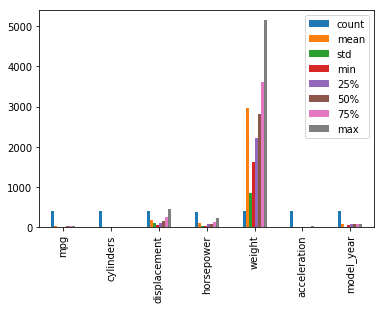

In [255]:
mpg.describe().T.plot.bar()

In [ ]:
# 도메인에 따라서 다름....뭐가?다른지...?
from scipy import interpolate

콜드스타트
- 데이터가 없어서 알고리즘이 잘 적용 안되는 문제 

#### --------------------------타입 바꾸는 방법! ---------------------------

In [168]:
olds['기준일자'].dtype

dtype('O')

In [170]:
olds['기준일자'] = olds['기준일자'].astype('datetime64')

In [171]:
olds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
경로당명칭    81 non-null object
주소       81 non-null object
부지(㎡)    81 non-null float64
건물(㎡)    81 non-null float64
회원총계     81 non-null int64
남자회원     81 non-null int64
여자회원     81 non-null int64
전화번호     81 non-null object
기준일자     81 non-null datetime64[ns]
시        81 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 6.4+ KB


In [173]:
olds['기준일자'].describe()

count                      81
unique                      1
top       2017-11-10 00:00:00
freq                       81
first     2017-11-10 00:00:00
last      2017-11-10 00:00:00
Name: 기준일자, dtype: object

astype은 쓸 일이 많은데 자주 쓰면 귀찮다. -> 바꿔주는 메서드가 있다.

In [174]:
olds = olds_raw.copy()

한 방에 바꿔준다.
- 시계열 분석할 때 더 자세히! :>

In [175]:
pd.to_datetime(olds['기준일자'])

0    2017-11-10
1    2017-11-10
2    2017-11-10
3    2017-11-10
4    2017-11-10
5    2017-11-10
6    2017-11-10
7    2017-11-10
8    2017-11-10
9    2017-11-10
10   2017-11-10
11   2017-11-10
12   2017-11-10
13   2017-11-10
14   2017-11-10
15   2017-11-10
16   2017-11-10
17   2017-11-10
18   2017-11-10
19   2017-11-10
20   2017-11-10
21   2017-11-10
22   2017-11-10
23   2017-11-10
24   2017-11-10
25   2017-11-10
26   2017-11-10
27   2017-11-10
28   2017-11-10
29   2017-11-10
        ...    
51   2017-11-10
52   2017-11-10
53   2017-11-10
54   2017-11-10
55   2017-11-10
56   2017-11-10
57   2017-11-10
58   2017-11-10
59   2017-11-10
60   2017-11-10
61   2017-11-10
62   2017-11-10
63   2017-11-10
64   2017-11-10
65   2017-11-10
66   2017-11-10
67   2017-11-10
68   2017-11-10
69   2017-11-10
70   2017-11-10
71   2017-11-10
72   2017-11-10
73   2017-11-10
74   2017-11-10
75   2017-11-10
76   2017-11-10
77   2017-11-10
78   2017-11-10
79   2017-11-10
80   2017-11-10
Name: 기준일자, Length: 81, 

파이썬에는 시간을 관리하는 패키지가 있다.
1. time - 속도 측정할 때 
2. datetime
    - 잘못 만들어서 datetime util 사용 
3. calendar

In [134]:
import datetime

In [135]:
dir(datetime)

['MAXYEAR',
 'MINYEAR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'date',
 'datetime',
 'datetime_CAPI',
 'sys',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

In [150]:
from datetime import datetime, timedelta, date, time

In [138]:
a = datetime(2019,7,23)

In [140]:
dir(a)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [141]:
a.year

2019

In [142]:
a.month

7

In [143]:
a.day

23

In [147]:
b = timedelta(days=5)

In [148]:
a+b

datetime.datetime(2019, 7, 28, 0, 0)

In [149]:
a-b

datetime.datetime(2019, 7, 18, 0, 0)

In [151]:
a = datetime.strptime('2019-07-23','%Y-%m-%d')

In [152]:
a

datetime.datetime(2019, 7, 23, 0, 0)

넘파이는 C기반이어서 타입캐스팅을 지원해준다.

In [154]:
import numpy as np

In [162]:
np.lookfor('type casting')

Search results for 'type casting'
---------------------------------
numpy.abs
    Calculate the absolute value element-wise.
numpy.add
    Add arguments element-wise.
numpy.cos
    Cosine element-wise.
numpy.exp
    Calculate the exponential of all elements in the input array.
numpy.gcd
    Returns the greatest common divisor of ``|x1|`` and ``|x2|``
numpy.lcm
    Returns the lowest common multiple of ``|x1|`` and ``|x2|``
numpy.log
    Natural logarithm, element-wise.
numpy.mod
    Return element-wise remainder of division.
numpy.sin
    Trigonometric sine, element-wise.
numpy.tan
    Compute tangent element-wise.
numpy._arg
    DO NOT USE, ONLY FOR TESTING
numpy.cbrt
    Return the cube-root of an array, element-wise.
numpy.ceil
    Return the ceiling of the input, element-wise.
numpy.conj
    Return the complex conjugate, element-wise.
numpy.cosh
    Hyperbolic cosine, element-wise.
numpy.exp2
    Calculate `2**p` for all `p` in the input array.
numpy.fabs
    Compute the absolute v

In [164]:
a = np.array([1,2,3])

In [160]:
a.dtype = np.int8

In [161]:
a

array([1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0], dtype=int8)

~로 type을 바꿔라!

In [165]:
a.astype('i8')

array([1, 2, 3], dtype=int64)